<a href="https://colab.research.google.com/github/skdding3/AI_Bootcamp_Project/blob/main/Section1_Project_Sunki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project**

다음 분기에 어떤 게임을 설계에 대한 인사이트 도출

1. 데이터 불러오기


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.stats as stats
import re
from pandas.plotting import table
%config InlineBackend.figure_format = 'retina'

In [ ]:
!sudo apt-get install -y fonts-NanumBarunGothic
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package fonts-NanumBarunGothic
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')

df.drop(df.columns[0] , axis = 1 , inplace = True)  #unnamed columns delete

df.head(30)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


Data Description

Name - 게임명

Platform - 게임이 출시된 플랫폼 (i.e. PC,PS4, etc.)

Year - 출시년도 (~2017)

Genre - 게임장르

Publisher - 출판사

NA_Sales - 북미 출고량 (100만)

EU_Sales - 유럽 출고량 (100만)

JP_Sales - 일본 출고량 (100만)
Other_Sales - 기타지역 출고량 (100만)
Global_Sales - 전세계 출고량 (100만)


데이터에 숫자 단위를 표현하는 K나 M이 있는걸 확인하였고,
보통 1M = 1000K라는 단위표현을 한다.

2. 데이터 정제 (EDA) 및 확인

In [ ]:
df.info()  #data information sales data string 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


Sales Data는 출고량 집계로 판단되며 일반적으로 float로 해석되는데 object가 있는걸 확인

In [ ]:
df.describe() #데이터가 2020년 까지 존재

,Year
count,16327.000000
mean,1994.242543
std,155.077168
min,0.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2020.000000


In [ ]:
df.NA_Sales.unique() #unit cluster

array(['0.04', '0.17', '0', '0.12', '0.02', '0.07', '480K', '0.14',
       '0.01', '0.57', '0.06', '0.08', '0.48', '0.03', '0.05', '1.93',
       '0.29', '0.19', '0.3', '0.26', '0.11', '0.18', '0.33', '0.51',
       '60K', '0.13', '0.52', '0.34', '0.25', '0.41', '0.22', '0.35',
       '0.1', '0.67', '0.59', '0.36', '0.21', '1.19', '5.91', '1.98',
       '0.09', '0K', '0.5', '0.94', '0.16', '0.63', '0.43', '0.2', '1.23',
       '0.44', '0.42', '0.97', '2.67', '0.28', '6.05', '0.47', '0.49',
       '0.62', '0.24', '0.72', '1.74', '0.46', '0.65', '0.32', '1.53',
       '0.23', '0.53', '0.37', '1.26', '0.39', '0.58', '1.94', '2.31',
       '1.03', '0.82', '0.4', '0.93', '0.56', '0.96', '1.64', '0.69',
       '1.25', '0.27', '0.92', '0.58M', '1.24', '0.25M', '0.86', '0.73',
       '0.55', '1.54', '1.02', '1.27', '0.54', '0.15', '1.09', '3.44',
       '2.29', '0.88', '5.55M', '1.37', '2.3', '0.99', '1.15', '0.98',
       '0.75', '0.74', '0.7', '0.14M', '0.45', '1.2', '1.41', '0.68',
       '

데이터들을 살펴보니 M기준 단위로 데이터가 구성되어있음을 확인하였고 중간중간에 K로 단위가 잡힌것을 알수있었음.

In [ ]:
num_col = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'] #Sales Data 칼럼 지정
for col in num_col:
    unit_k = (df[col].str.extract('([K-M])', expand = False) == 'K') # K의 단위를 가진 데이터
    unit_m = (df[col].str.extract('([K-M])', expand = False) == 'M') # M의 단위를 가진 데이터

    df[col][unit_k] = df[col][unit_k].apply(lambda x: re.sub("([K-M])","",x)).astype(float) #K를제거
    df[col][unit_k] = df[col][unit_k]/1000 #이후 M단위에 맞춤 1M = 1000K ex)Ford Racing 480K -> 0.48

    df[col][unit_m] = df[col][unit_m].apply(lambda x: re.sub("([K-M])","",x)).astype(float) #M 제거 
  
    df[col] = df[col].astype(float)

In [ ]:
df.head(30)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0.00,0.00
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0.00,0.11,0.01
8,Imabikisou,PS3,2007.0,Adventure,Sega,0.00,0.00,0.04,0.00
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0.00,0.01


In [ ]:
unit_1000 = (df['Year'] < 1000)  #Year 관련된 4자리 함수

df['Year'][unit_1000] = df['Year'][unit_1000].apply(lambda x : x+ 2000 
                                                    if x < 21 
                                                    else x + 1900)

In [ ]:
np.sort(df['Year'].unique())

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016., 2017., 2020.,   nan])

In [ ]:
year_delete = df[(df['Year'] == 2020)].index #data 1 x

df.drop(year_delete, inplace = True)

Publisher는 다음 게임 설계 인사이트에서 불필요한 정보라 판단

In [ ]:
df.drop('Publisher', axis = 1 , inplace = True)

In [ ]:
df.dropna(how = 'any', inplace = True) #결측된 데이터가 전체 데이터 비중에서 많은 비중이 아니여서 제거

In [ ]:
def replace_year_na(df, condition_cols, cols):
  s = df.groupby(condition_cols)[cols].transform('median')
  return df.fillna(s.to_dict('series'))

df_r = replace_year_na(df, ['Platform', 'Genre'], ['Year'])

In [ ]:
np.sort(df['Year'].unique())

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016., 2017.])

In [ ]:
df['Global_Sales'] = df[num_col].sum(axis = 1)
df.head()

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,0.12,0.09,0.00,0.04,0.25


In [ ]:
df.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

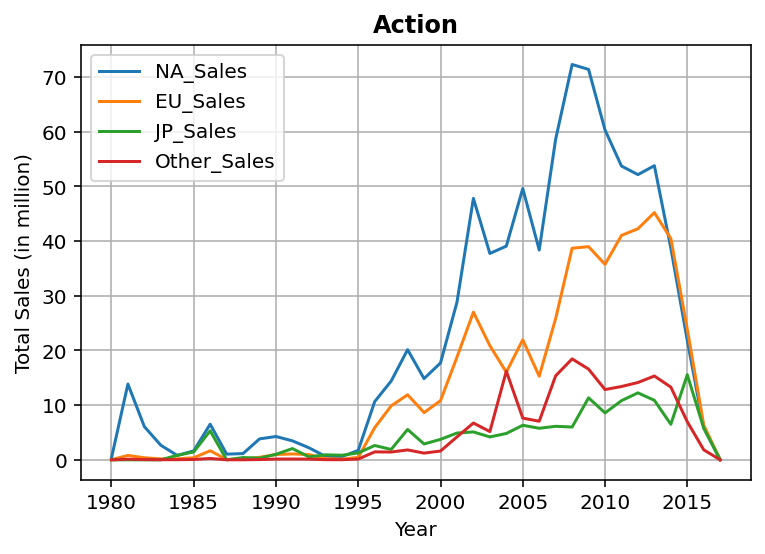

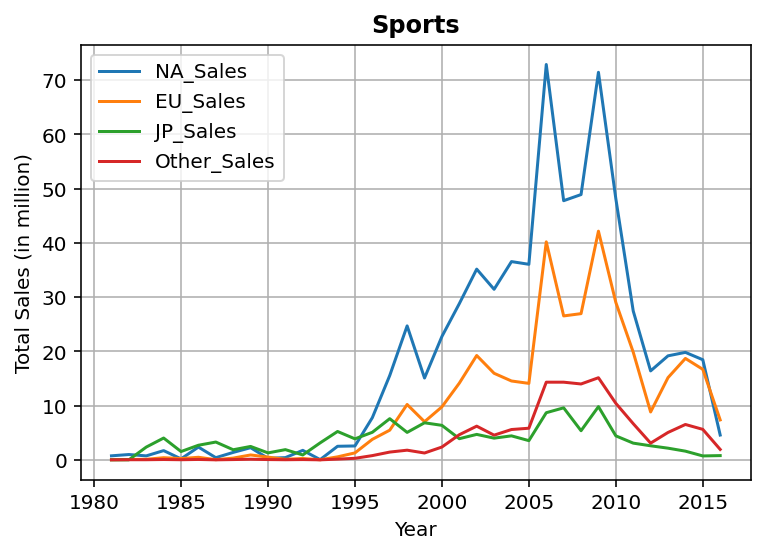

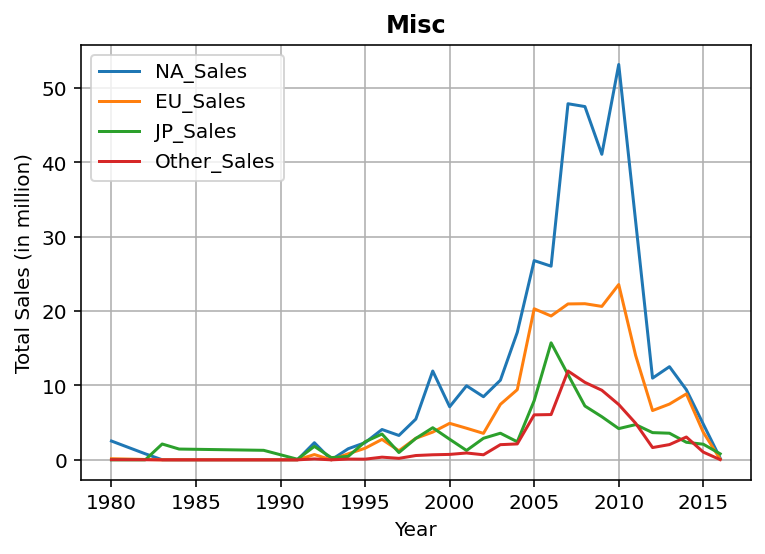

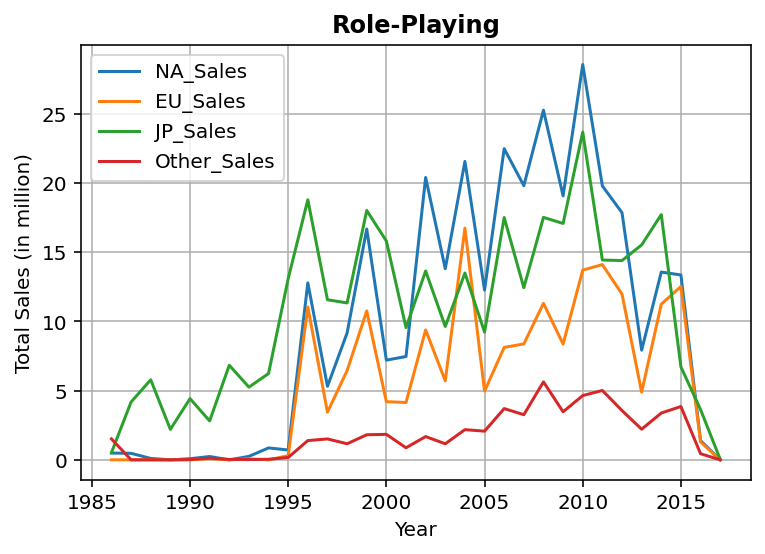

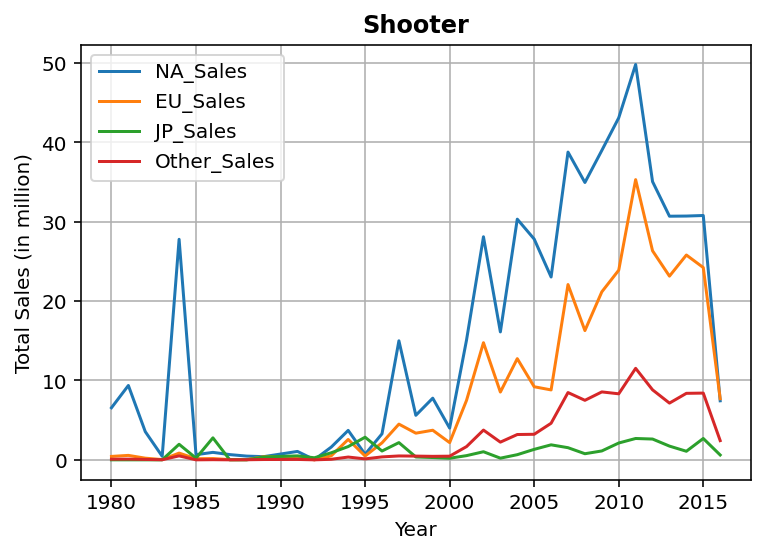

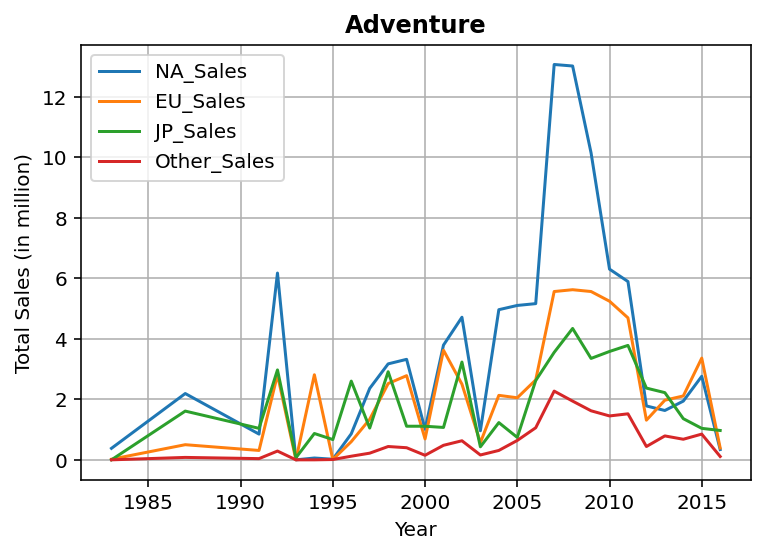

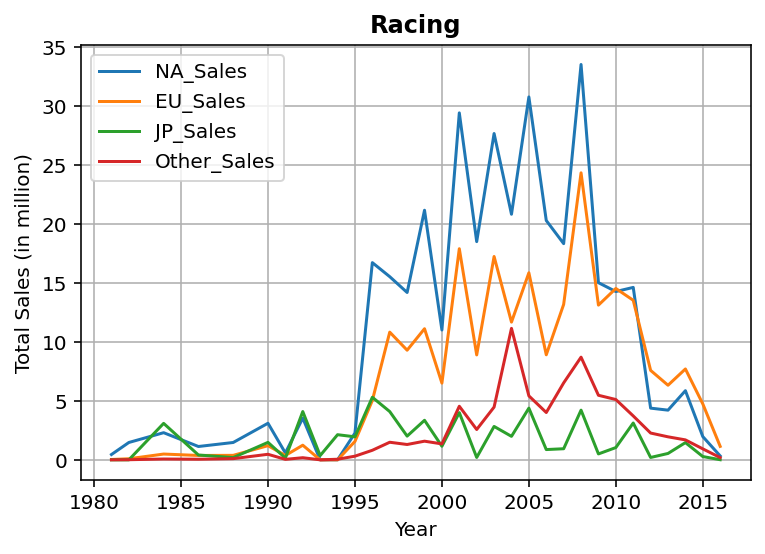

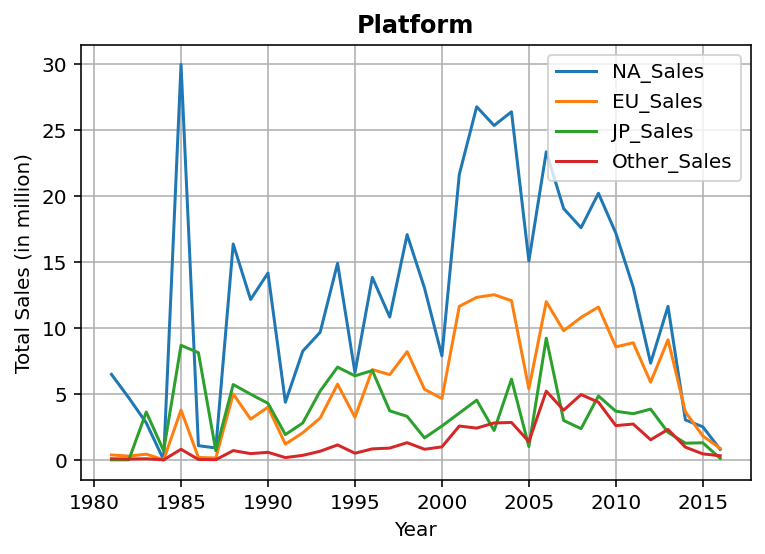

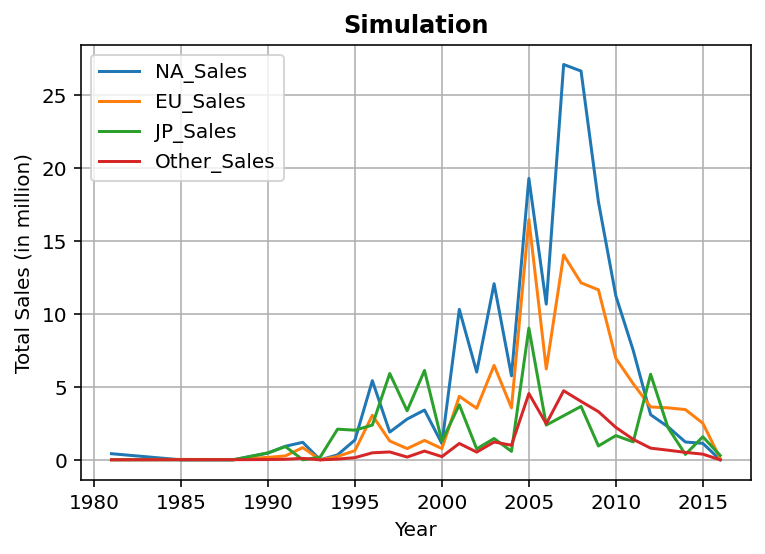

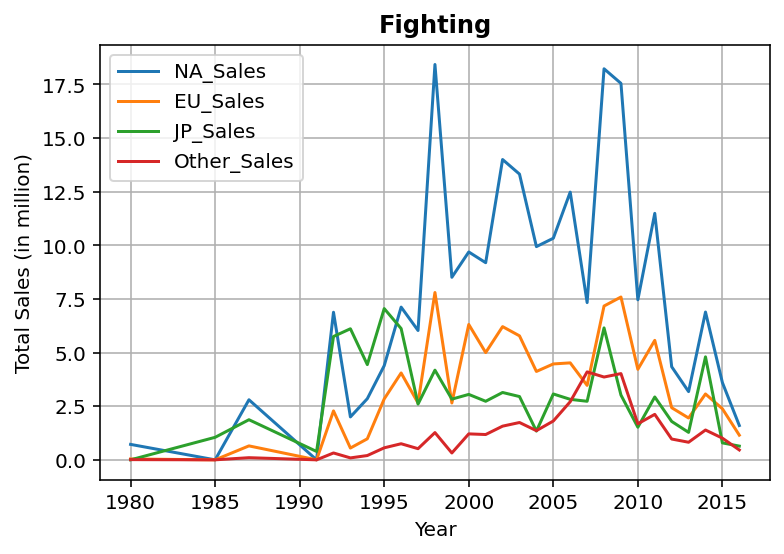

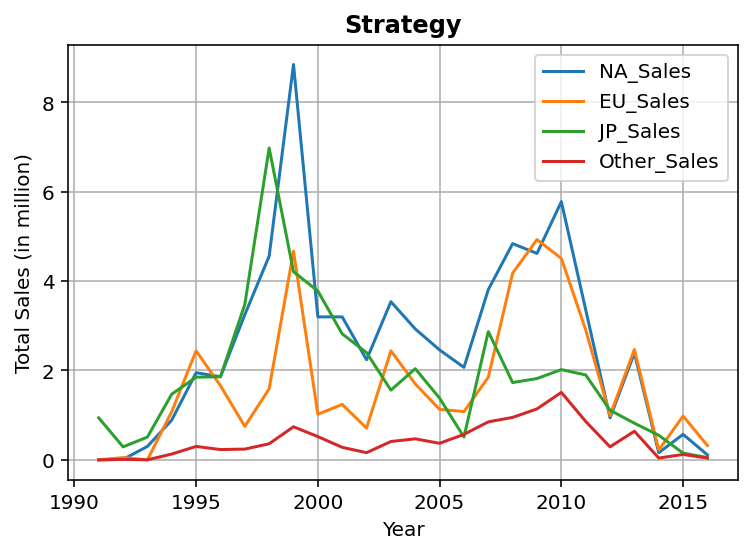

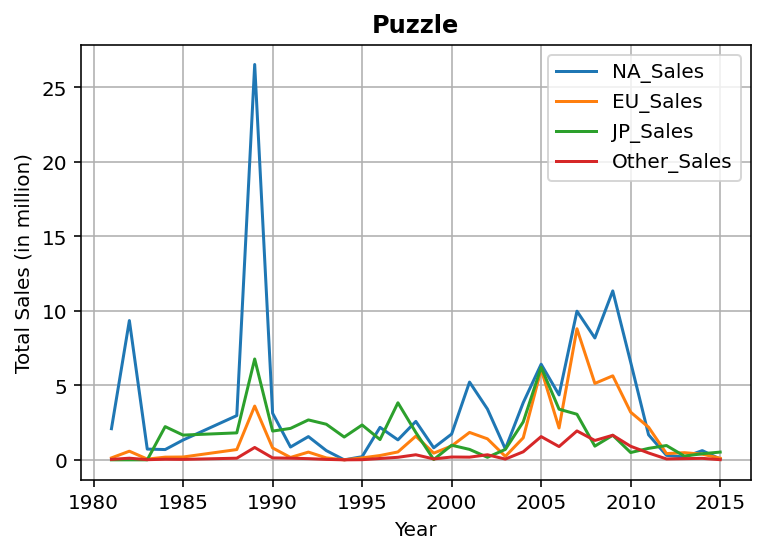

In [ ]:
 #지역별 출고량 시간 및 장르별 그래프
font_title = {
        'color':  'black',
        'weight': 'bold',
        'size': 12,
        }

font_text = {
    'color':  'black',
    'size': 10,
    }

genre_list = df['Genre'].value_counts().index.to_list()
for gr in genre_list:
  cond_genre = (df['Genre'] == gr)
  df[cond_genre].groupby(by = 'Year')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().plot(legend = True)

  plt.title(gr, fontdict = font_title)
  plt.ylabel("Total Sales (in million)", fontdict= font_text)
  plt.xlabel("Year",fontdict = font_text) 

  plt.grid()
  plt.show()

2.연도별 게임의 트렌드 분석

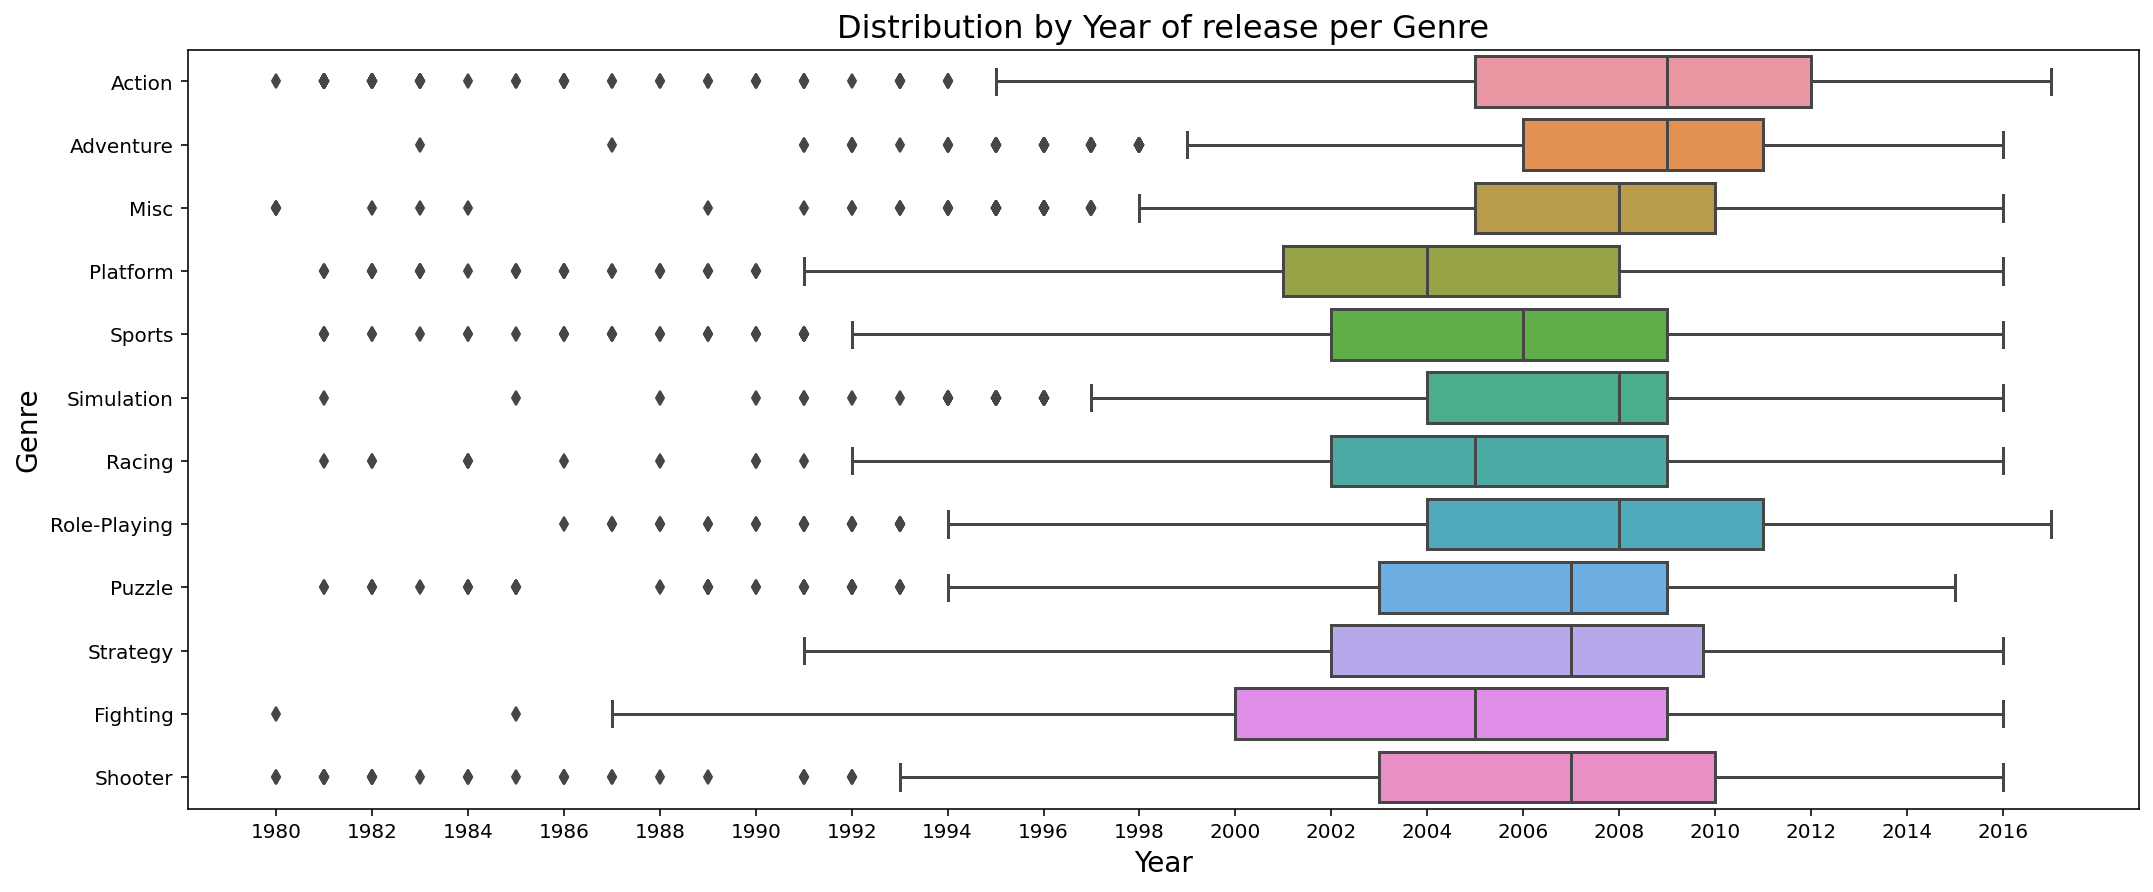

In [ ]:
#Box plot 게임 장르 출시 빈도
plt.figure(figsize=(15,6))

sns.boxplot(data=df, x='Year', y='Genre')
plt.xticks(np.arange(1980,2017,2))
plt.tight_layout()
plt.title('Distribution by Year of release per Genre', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Genre', fontsize=14);

위의 그림은 게임들이 주로 각 장르에 대해 출시된 시기를 나타냄 2005-2012년 사이에 대부분의 액션 게임이 출시했다.

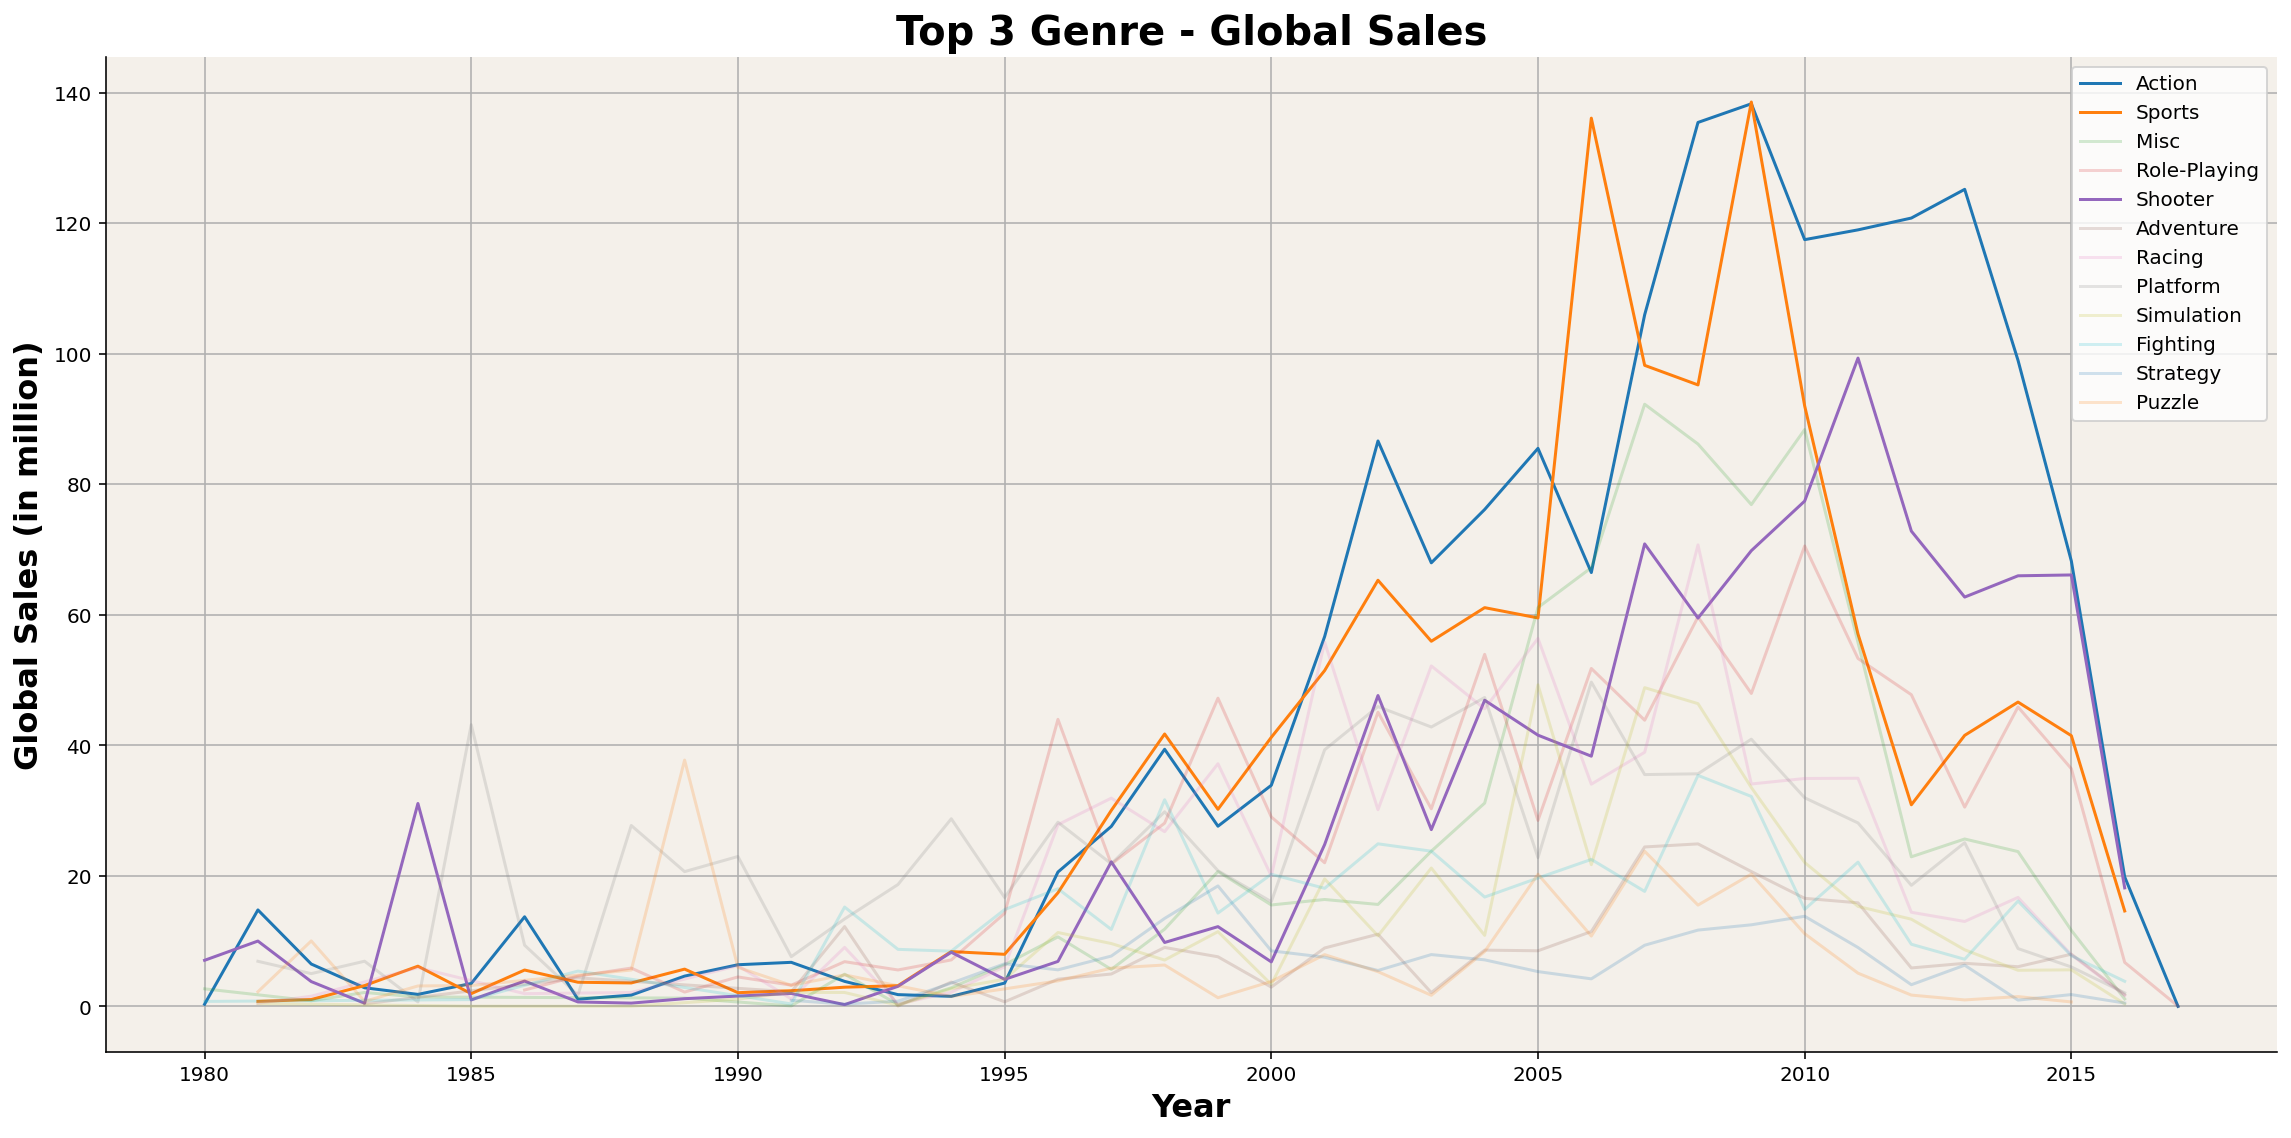

In [ ]:
genre_list = df['Genre'].value_counts().index.to_list()
fig, ax = plt.subplots(figsize = (16,8))


top3 = ['Action', 'Shooter', 'Sports']


for gr in genre_list:
  gr_cond = (df['Genre'] == gr)


#top 3를 제외한 나머지 투명도 조정
  if gr in top3:
    alpha = 1
  else:
    alpha = 0.2

  plt.plot('Year','Global_Sales',data =  pd.DataFrame(df[gr_cond].groupby(by = ['Year'])[['Global_Sales']].sum()).reset_index(), label = gr, alpha = alpha)



font_title = {
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }
ax.set_title("Top 3 Genre - Global Sales", fontdict = font_title)



font_text = {
    'color':  'black',
    'weight': 'bold',
    'size': 16
         }

plt.ylabel("Global Sales (in million)", fontdict = font_text)
plt.xlabel("Year",fontdict = font_text)


for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)


ax.grid(True)
ax.set_facecolor('#f4f0ea')
plt.legend()
fig.tight_layout()
plt.show()

전세계 장르 판매량을 비교해 보았더니, 액션 스포츠 슈터 장르가 강세

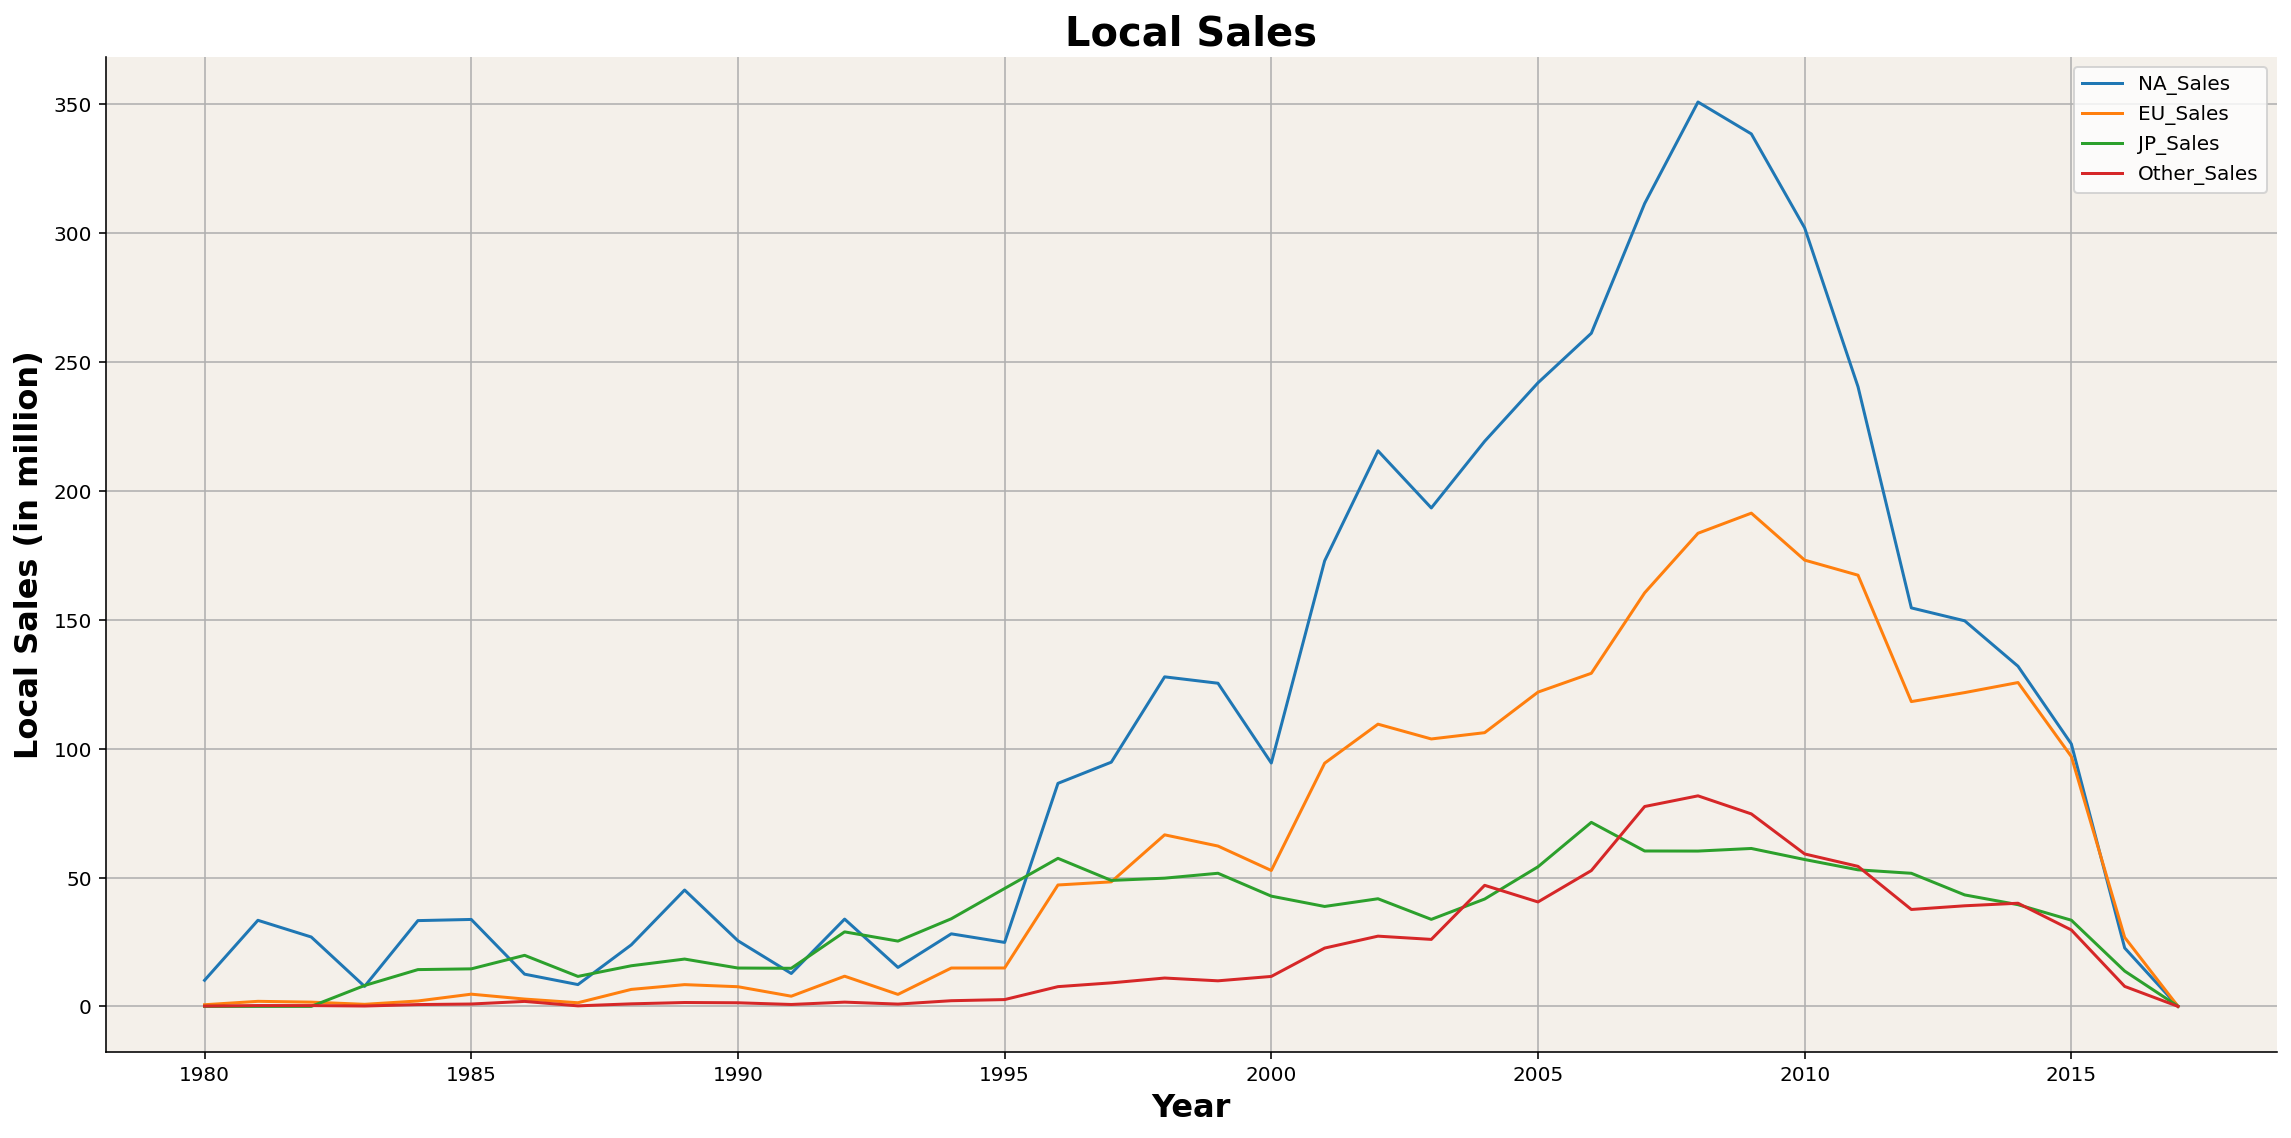

In [ ]:
loc_list = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
fig, ax = plt.subplots(figsize = (16,8))

# Top 3 장르
top3 = ['NA_Sales','EU_Sales']

for loc in loc_list:
  loc_cond = (df['Genre'] == gr)

  plt.plot('Year',loc,data =  pd.DataFrame(df.groupby(by = ['Year'])[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()).reset_index(), label = loc)



font_title = {
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }
ax.set_title("Local Sales", fontdict = font_title)


font_text = {
    'color':  'black',
    'weight': 'bold',
    'size': 16,
    }

plt.ylabel("Local Sales (in million)", fontdict = font_text)
plt.xlabel("Year",fontdict = font_text)



for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)



ax.grid(True)
ax.set_facecolor('#f4f0ea') #배경색
plt.legend()
fig.tight_layout()
plt.show()

전세계 판매량을 놓고 봤을땐, 북미가 가장 콘솔 게임 수요가 많음을 알 수 있음.

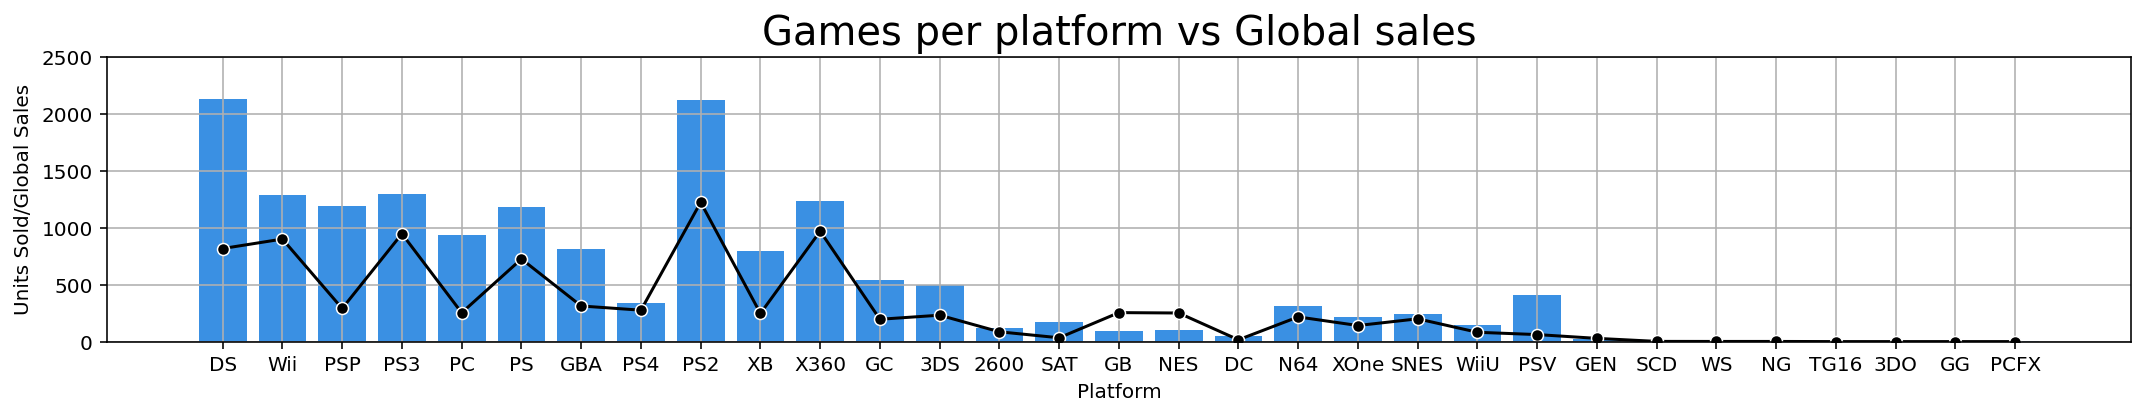

In [ ]:
#countplot = 출시량 , lineplot = 판매량

fig, ax = plt.subplots(figsize=(15,3))

sns.countplot(ax=ax, data=df, x='Platform', color='dodgerblue')
sns.lineplot(ax=ax, data=df, x='Platform', y='Global_Sales', estimator=np.sum, ci=None, color='black', marker='o')

plt.ylabel("Units Sold/Global Sales")
plt.ylim(0,2500)
plt.grid(True)
plt.title('Games per platform vs Global sales', fontsize=20)
plt.tight_layout();

위의 그림은 플랫폼당 게임 수와 플랫폼당 글로벌 판매 총계를 비교한 것인데,
해당 데이터에서 PS2와 Nintendo DS의 게임 수가 가장 많았음을 분명히 알 수 있지만, 검은 그래프에서 보이는 전 세계 판매에서 PS2는 XBOX 360에 이어 차트의 선두를 달리고 있다. 이러한 통계는 PS2 와 XBOX 360가 수요비중이 꽤 차지함을 알수 있음. 


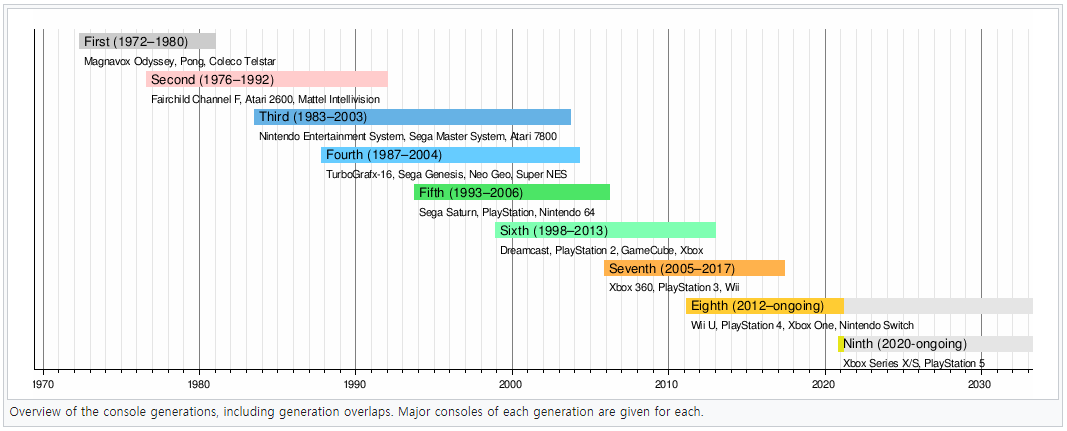

하지만 시간이 지나면서 해당 레퍼런스 자료와 같이 플랫폼은 시간이 지날수록 세대교체가 이루어짐을 알수있다.
즉 PS2, XBOX 360를 이은 새로운 플랫폼으로 이동하는 트렌드를 염두해야한다.

In [ ]:
# Violin Plot
# 2010년 부터 17년
unit_2017 = ( (df['Year'] <= 2017) & (df['Year'] > 2010) )
df1_2017 = df[unit_2017].reset_index()
df1_2017.drop('index', axis = 1, inplace = True)

#플랫폼
platform_2017 = df1_2017['Platform'].value_counts().index.tolist()


#2000년 부터 10년
cond_2010 = ( (df['Year'] <= 2010) & (df['Year'] > 2000) )
df1_2010 = df[cond_2010].reset_index()
df1_2010.drop('index', axis = 1, inplace = True)

platform_2010 = df1_2010['Platform'].value_counts().index.tolist()


#2000년 전
cond_2000 = (df['Year'] <= 2000)
df1_2000 = df[cond_2000].reset_index()
df1_2000.drop('index', axis = 1, inplace = True)

# Platform
platform_2000 = df1_2000['Platform'].value_counts().index.tolist()

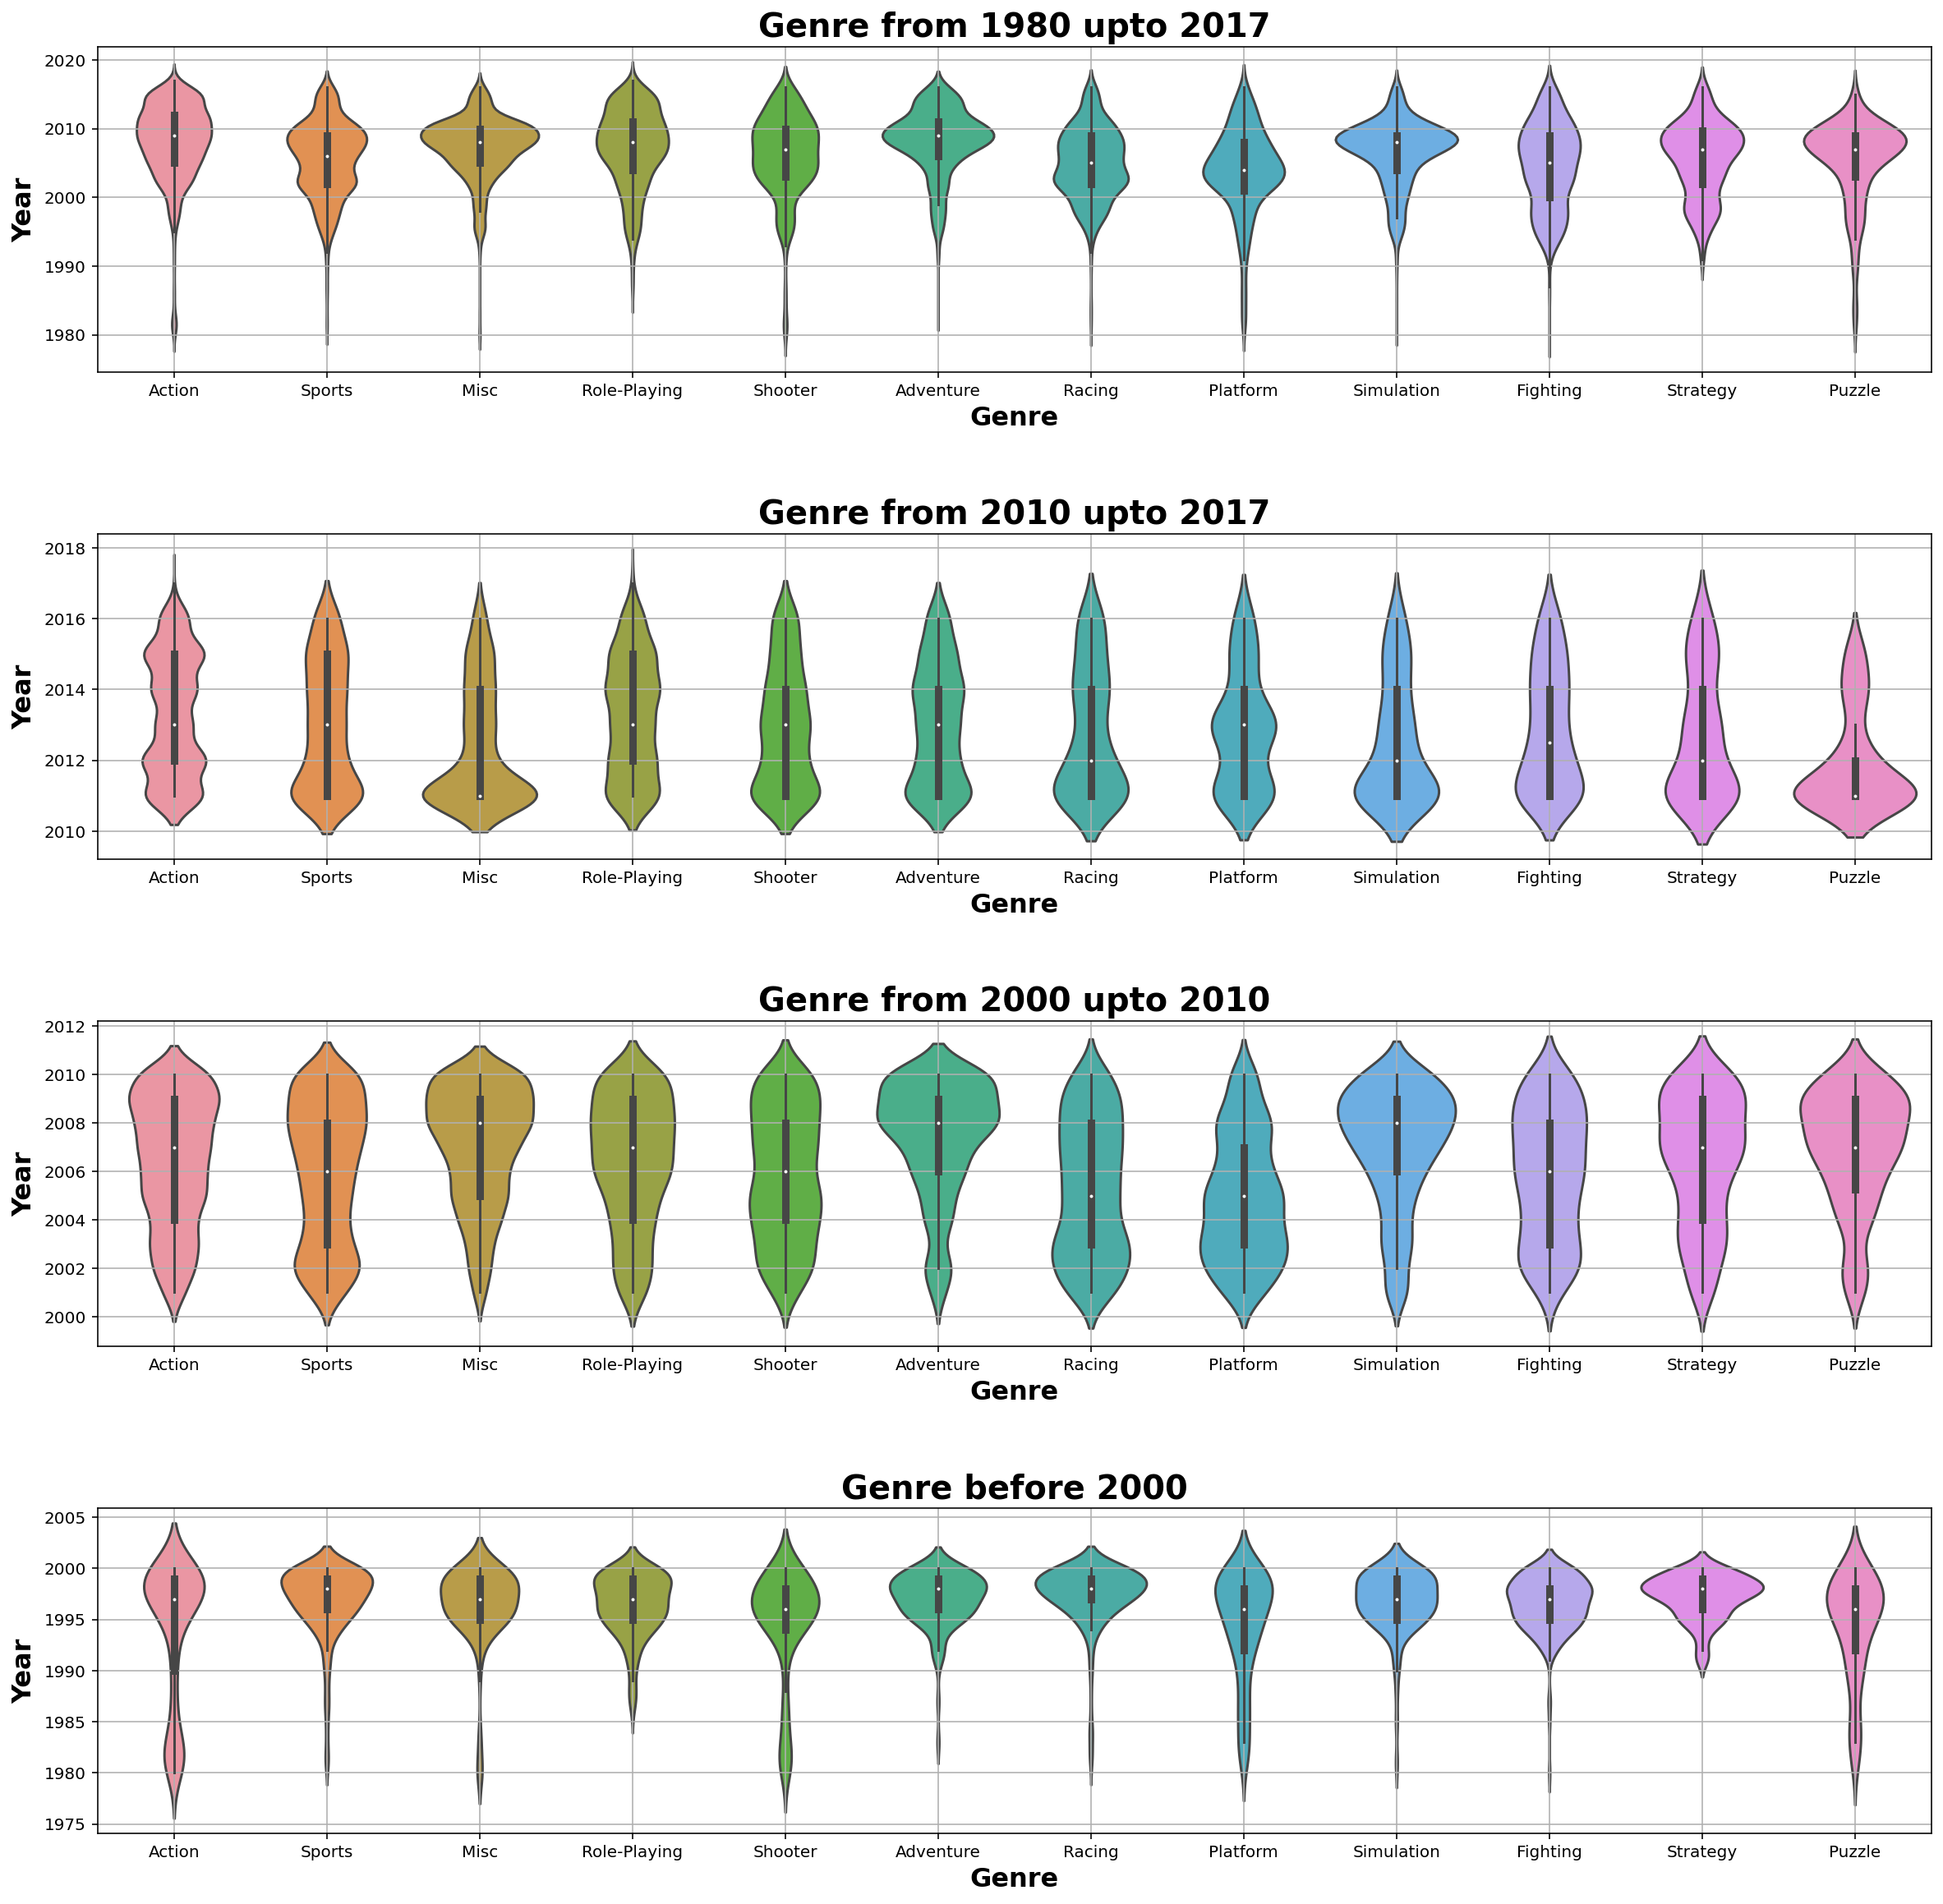

In [ ]:
fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (20,20))
# Order of Categories
orders = df['Genre'].value_counts().index.tolist()
# list title
# Entire
sns.violinplot(x = 'Genre', y = 'Year', data = df, ax = axes[0], order = orders)
axes[0].set_title("Genre from 1980 upto 2017", fontdict = font_title)
axes[0].set_xlabel('Genre', fontdict = font_text)
axes[0].set_ylabel('Year', fontdict = font_text)
axes[0].grid(True)

# 2010년 부터 17년
sns.violinplot(x = 'Genre', y = 'Year', data = df1_2017, ax = axes[1], order = orders)
axes[1].set_title("Genre from 2010 upto 2017", fontdict = font_title)
axes[1].set_xlabel('Genre', fontdict = font_text)
axes[1].set_ylabel('Year', fontdict = font_text)
axes[1].grid(True)

#2000년 부터 10년
sns.violinplot(x = 'Genre', y = 'Year', data = df1_2010, ax = axes[2], order = orders)
axes[2].set_title("Genre from 2000 upto 2010", fontdict = font_title)
axes[2].set_xlabel('Genre', fontdict = font_text)
axes[2].set_ylabel('Year', fontdict = font_text)
axes[2].grid(True)

#2000년 전
sns.violinplot(x = 'Genre', y = 'Year', data = df1_2000, ax = axes[3], order = orders)
axes[3].set_title("Genre before 2000", fontdict = font_title)
axes[3].set_xlabel('Genre', fontdict = font_text)
axes[3].set_ylabel('Year', fontdict = font_text)
axes[3].grid(True)

plt.subplots_adjust(hspace= 0.5)
plt.show()

위 그림을 통해 출시 장르에 대한 분포를 봤을때 액션,스포츠,슈터 장르가 꾸준히 사랑받는 장르임을 알 수 있었다.

In [ ]:
def pie_chart_platform(bottom_yr, upper_yr, r, genre):
  # yr = 년도 
  # r = 글로벌 판매량 퍼센트 기준
  yr_cond = ( (df['Year'] > bottom_yr) & (df['Year'] <= upper_yr) )
  top3_data = pd.DataFrame(df[yr_cond].groupby(by = ['Platform','Genre'])[['Global_Sales']].sum()).reset_index()


  platform_top = top3_data[top3_data['Genre'] == genre]
  sum_global = platform_top['Global_Sales']
  platform_top['Percent_Global'] = 100* (platform_top['Global_Sales']/platform_top['Global_Sales'].sum())
  platform_top.sort_values(by = 'Global_Sales', ascending = False, inplace = True)


  cond_above = (platform_top['Percent_Global'] >= r)
  cond_below = (platform_top['Percent_Global'] < r)

  above = platform_top[cond_above].copy()
  above = above[['Platform', 'Percent_Global']]

  new_row = pd.DataFrame(data = {
      'Platform' : ['Others'],
      'Percent_Global' : [platform_top['Percent_Global'][cond_below].sum()]
  })

  others = platform_top[cond_below].copy()
  others = others[['Platform', 'Percent_Global']]


  combined = pd.concat([above, new_row])
  combined.sort_values(by = 'Percent_Global', ascending= False, inplace = True)

  plt.figure(figsize = (18,10))


  combined_list = combined['Platform']
  sizes_comb = combined['Percent_Global']
  explode = np.ones(len(combined_list))/10
  
  centre_circle = plt.Circle((0,0),0.30,color='white')               #차트 가운데 빈공간 형성
  plt.gca().add_artist(centre_circle)

  plt.pie(sizes_comb, labels = combined_list, explode = explode, autopct = '%1.1f%%',            #piechart 
              shadow=True, startangle = 90, counterclock = False, textprops = {'fontsize': 20})


  others_list = others['Platform']
  sizes_other = others['Percent_Global']
  explode = np.ones(len(others_list))/10


  font_title = {
          'color':  'black',
          'weight': 'bold',
          'size': 20,
          }

  font_text = {
      'color':  'black',
      'weight': 'bold',
      'size': 12,
      }
  plt.title('{0}: Platforms {1}% Market-share \nin between {2} and {3}'.format(genre, r, bottom_yr, upper_yr), fontdict = font_title)
  plt.tight_layout()
  plt.show()

최근 5년간 Top 3 장르별 플랫폼 분포

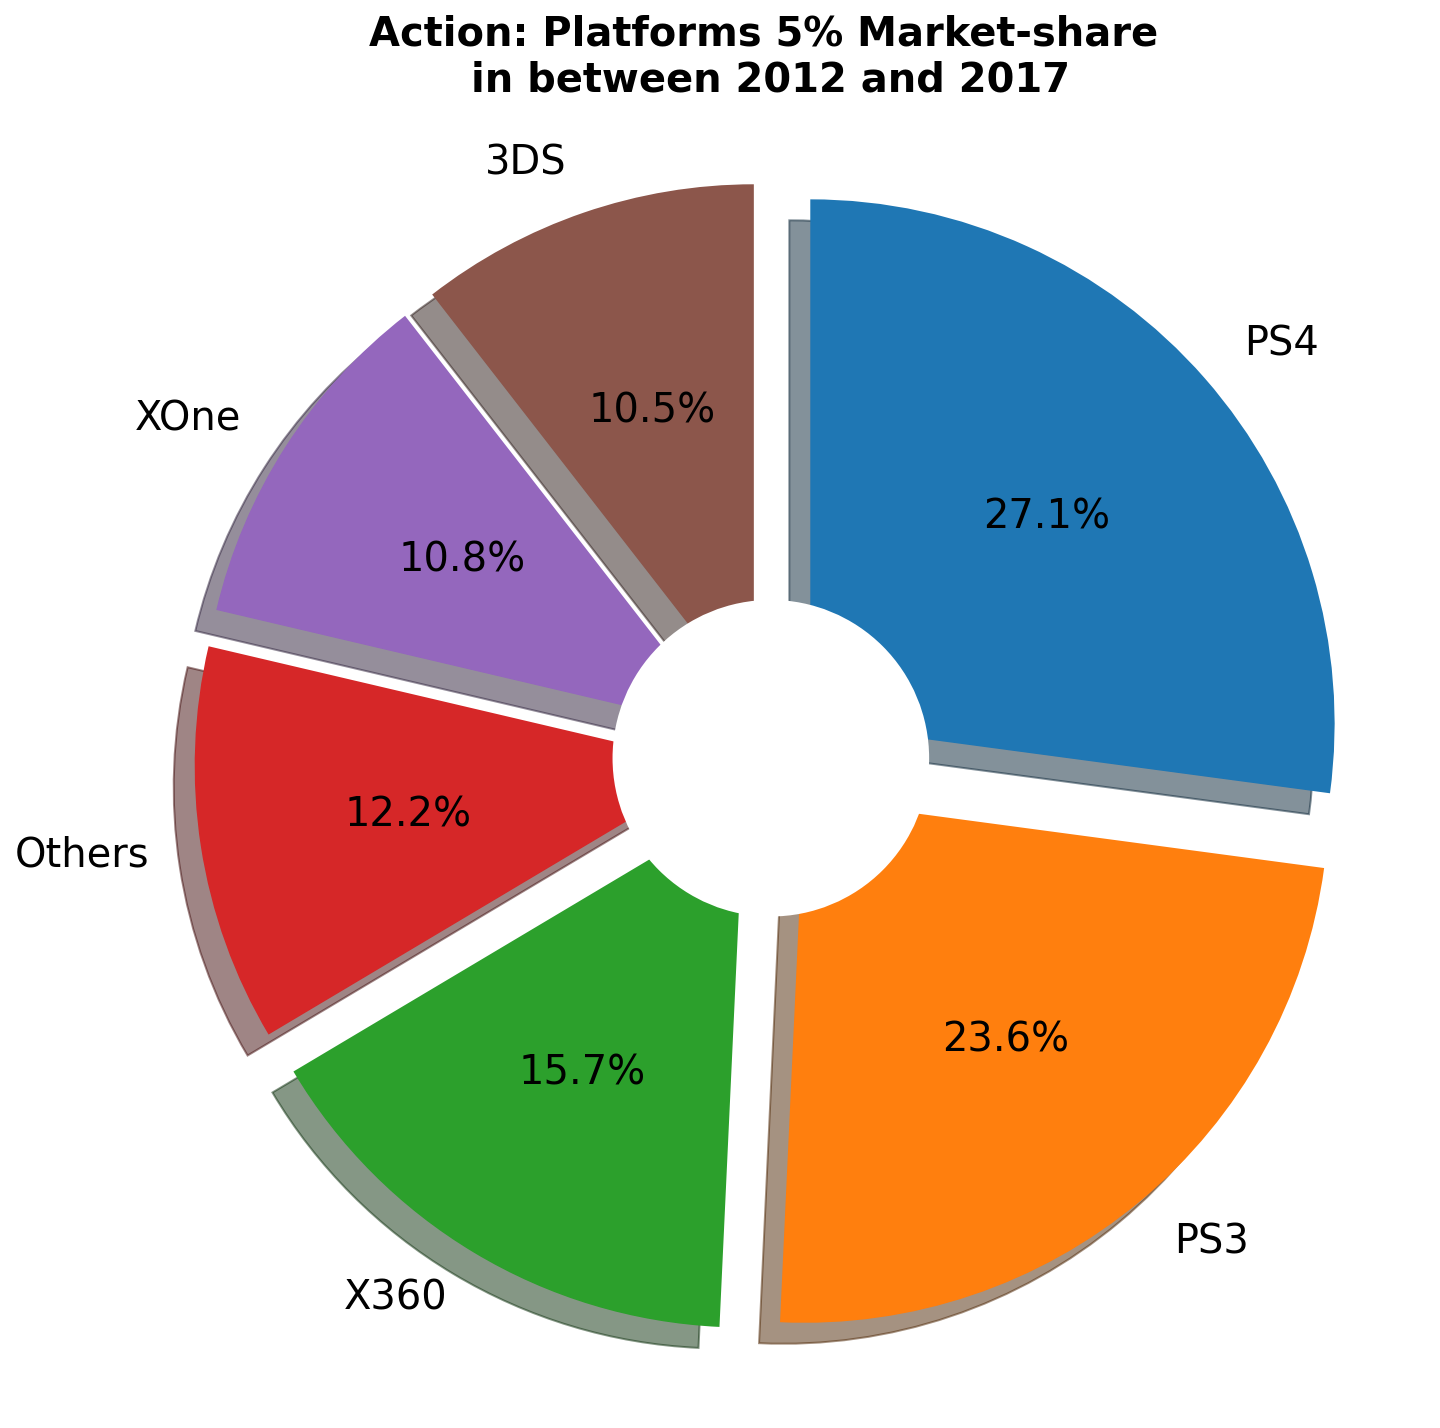

In [ ]:
pie_chart_platform(bottom_yr = 2012, upper_yr = 2017, r = 5, genre = 'Action')

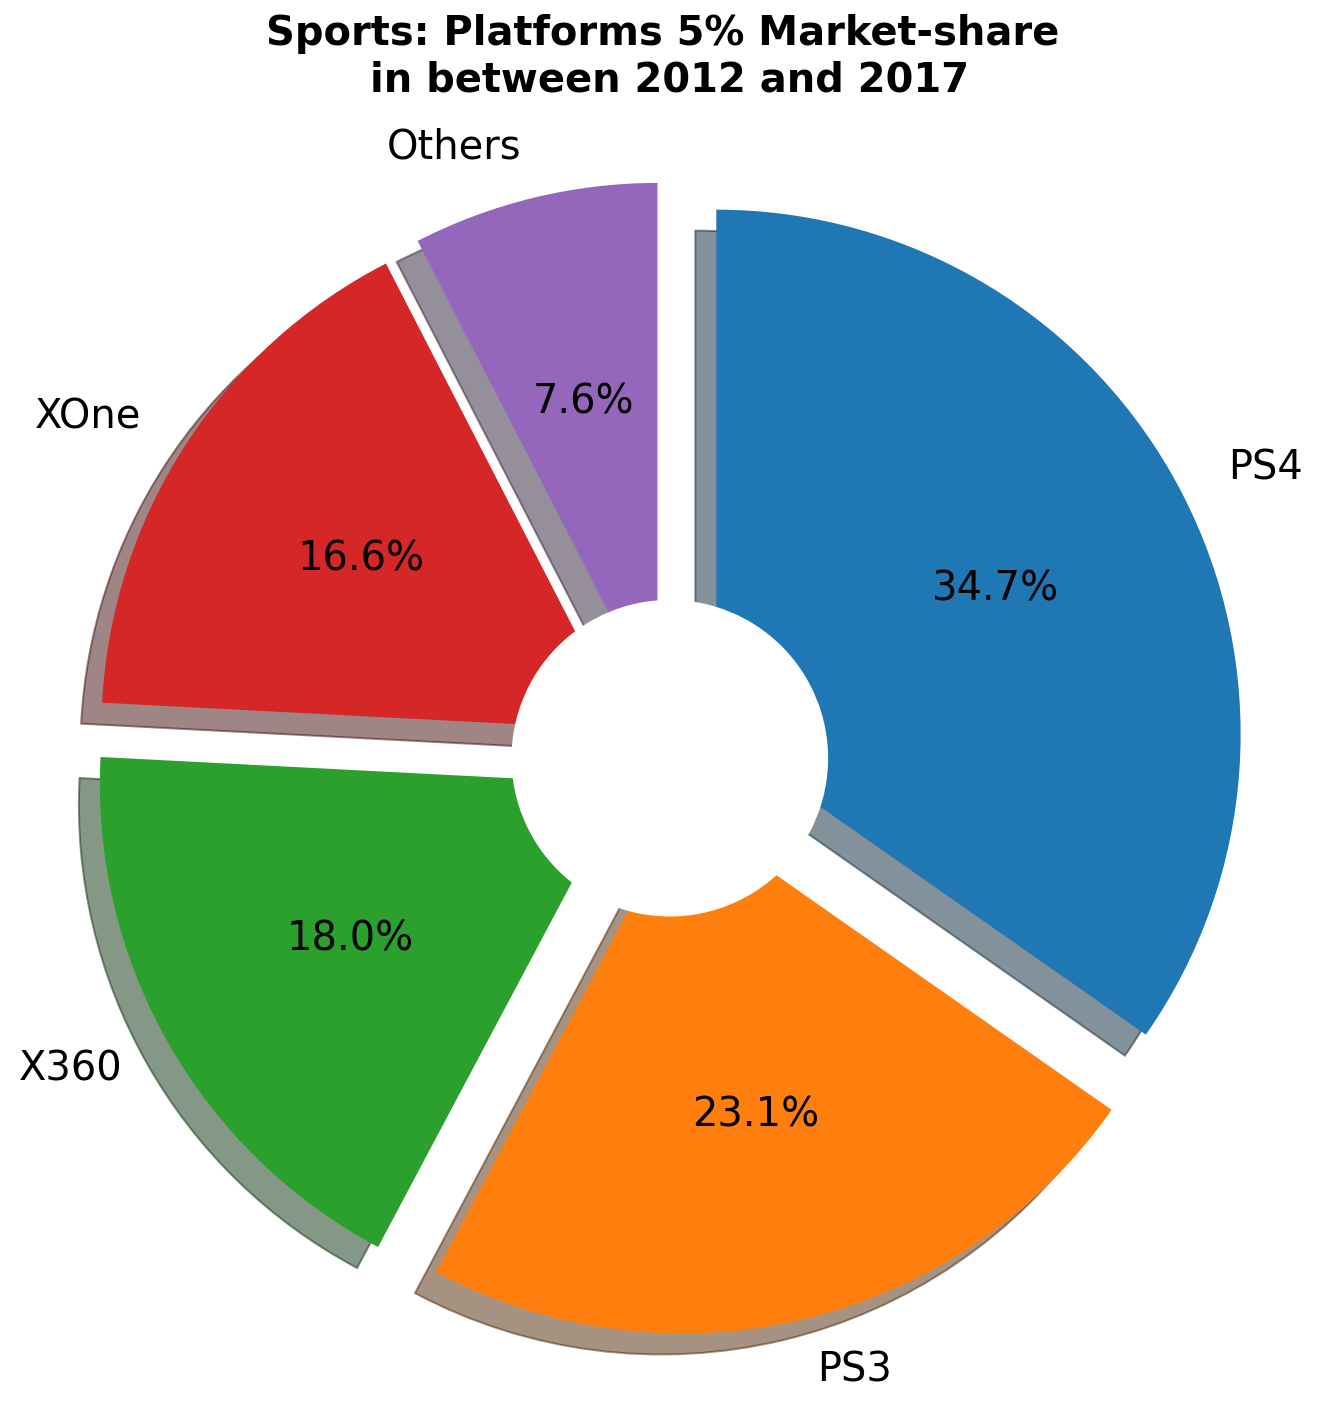

In [ ]:
pie_chart_platform(bottom_yr = 2012, upper_yr = 2017, r = 5, genre = 'Sports')

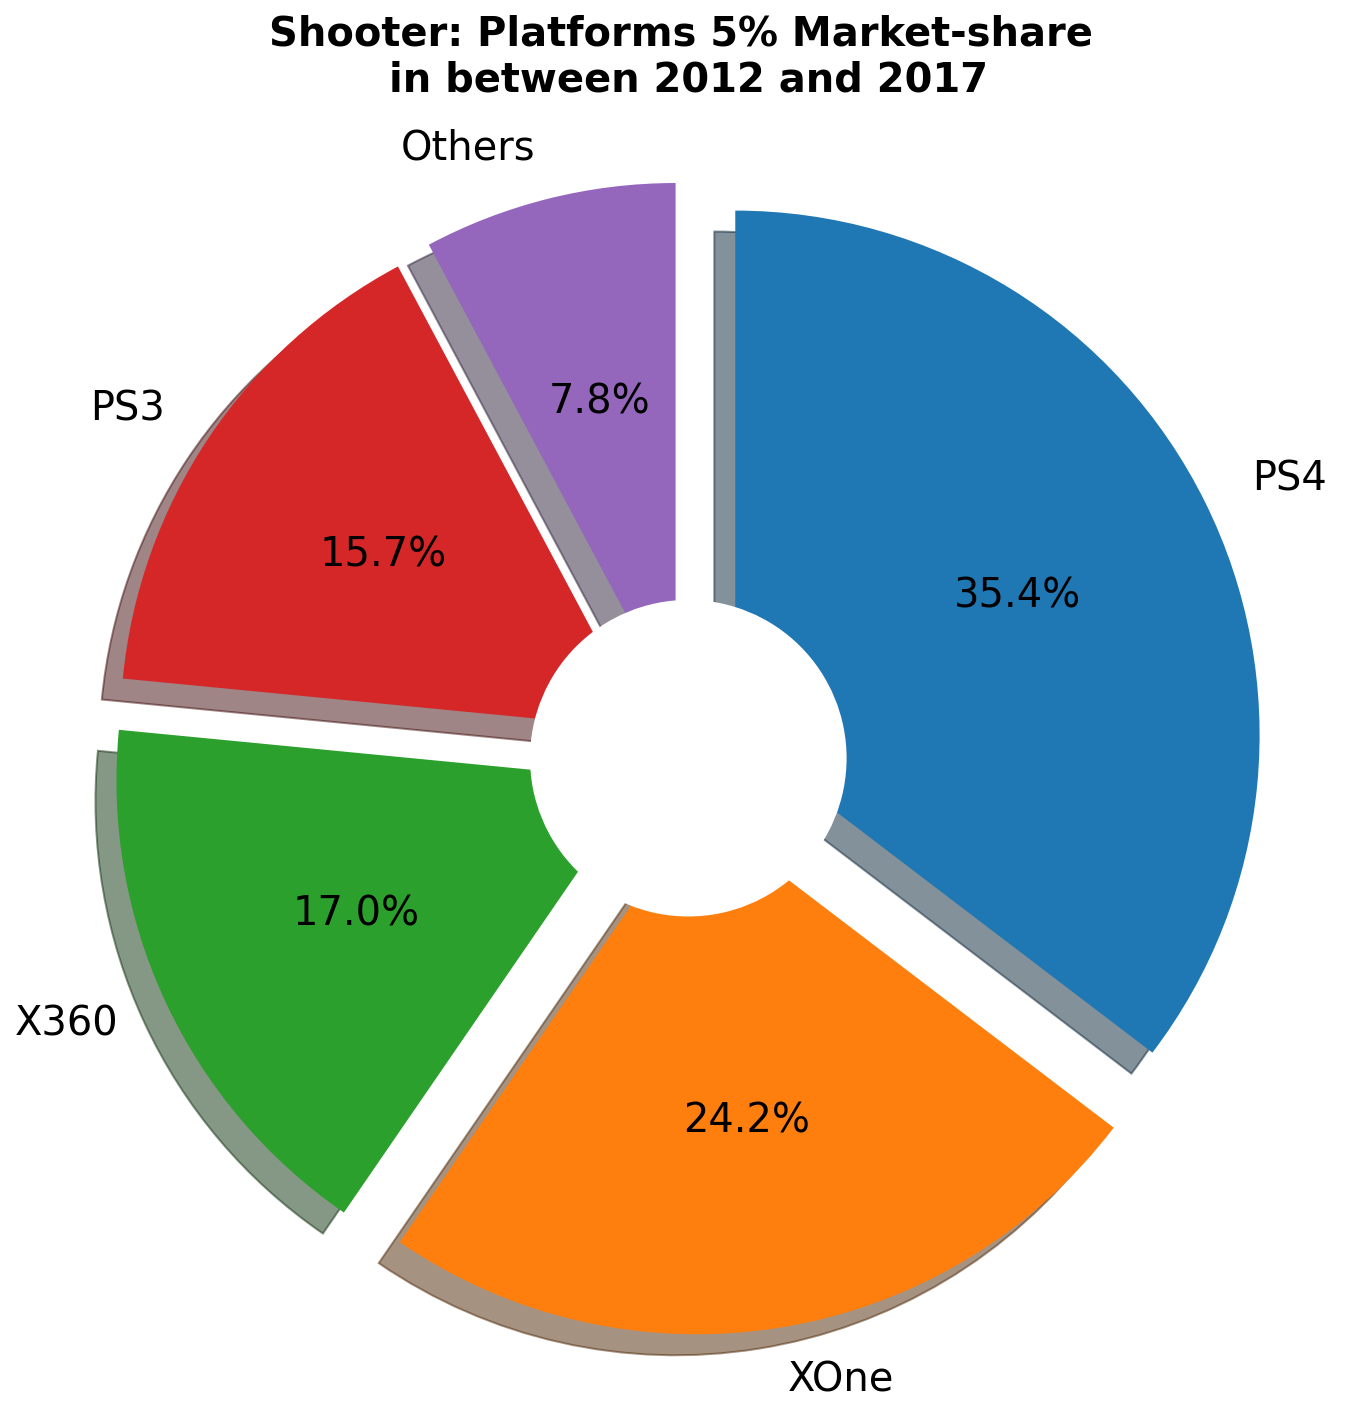

In [ ]:
pie_chart_platform(bottom_yr = 2012, upper_yr = 2017, r = 5, genre = 'Shooter')

파이차트로 장르별 분석을 

In [ ]:
def cum_sales_platform(genre, yr):
  platform_df = df[(df['Platform'] == genre)].reset_index()
  platform_df.drop('index', axis = 1, inplace = True)
  platform_df = platform_df.groupby(by = 'Year')[['Global_Sales']].sum().reset_index()

  fig, axes = plt.subplots(figsize = (18,8))

  plt.bar('Year', 'Global_Sales', data = platform_df)

  axes.set_title("Global Sales: {0} after {1}".format(genre, yr), size = 25)
  plt.ylabel("Global Sales (in million)")
  plt.xlabel("Year")

  yr_sort = list( np.sort(df['Year'].unique()) ) 
  x_axis = [yr_sort for yr_sort in yr_sort if yr_sort >= yr]
  plt.xticks(x_axis)

  plt.yticks(range(0, 260, 40))

  for spine in ["top", "right"]:
      axes.spines[spine].set_visible(False)

  axes.grid(True)
  axes.set_facecolor('#f4f0ea')

  plt.show()

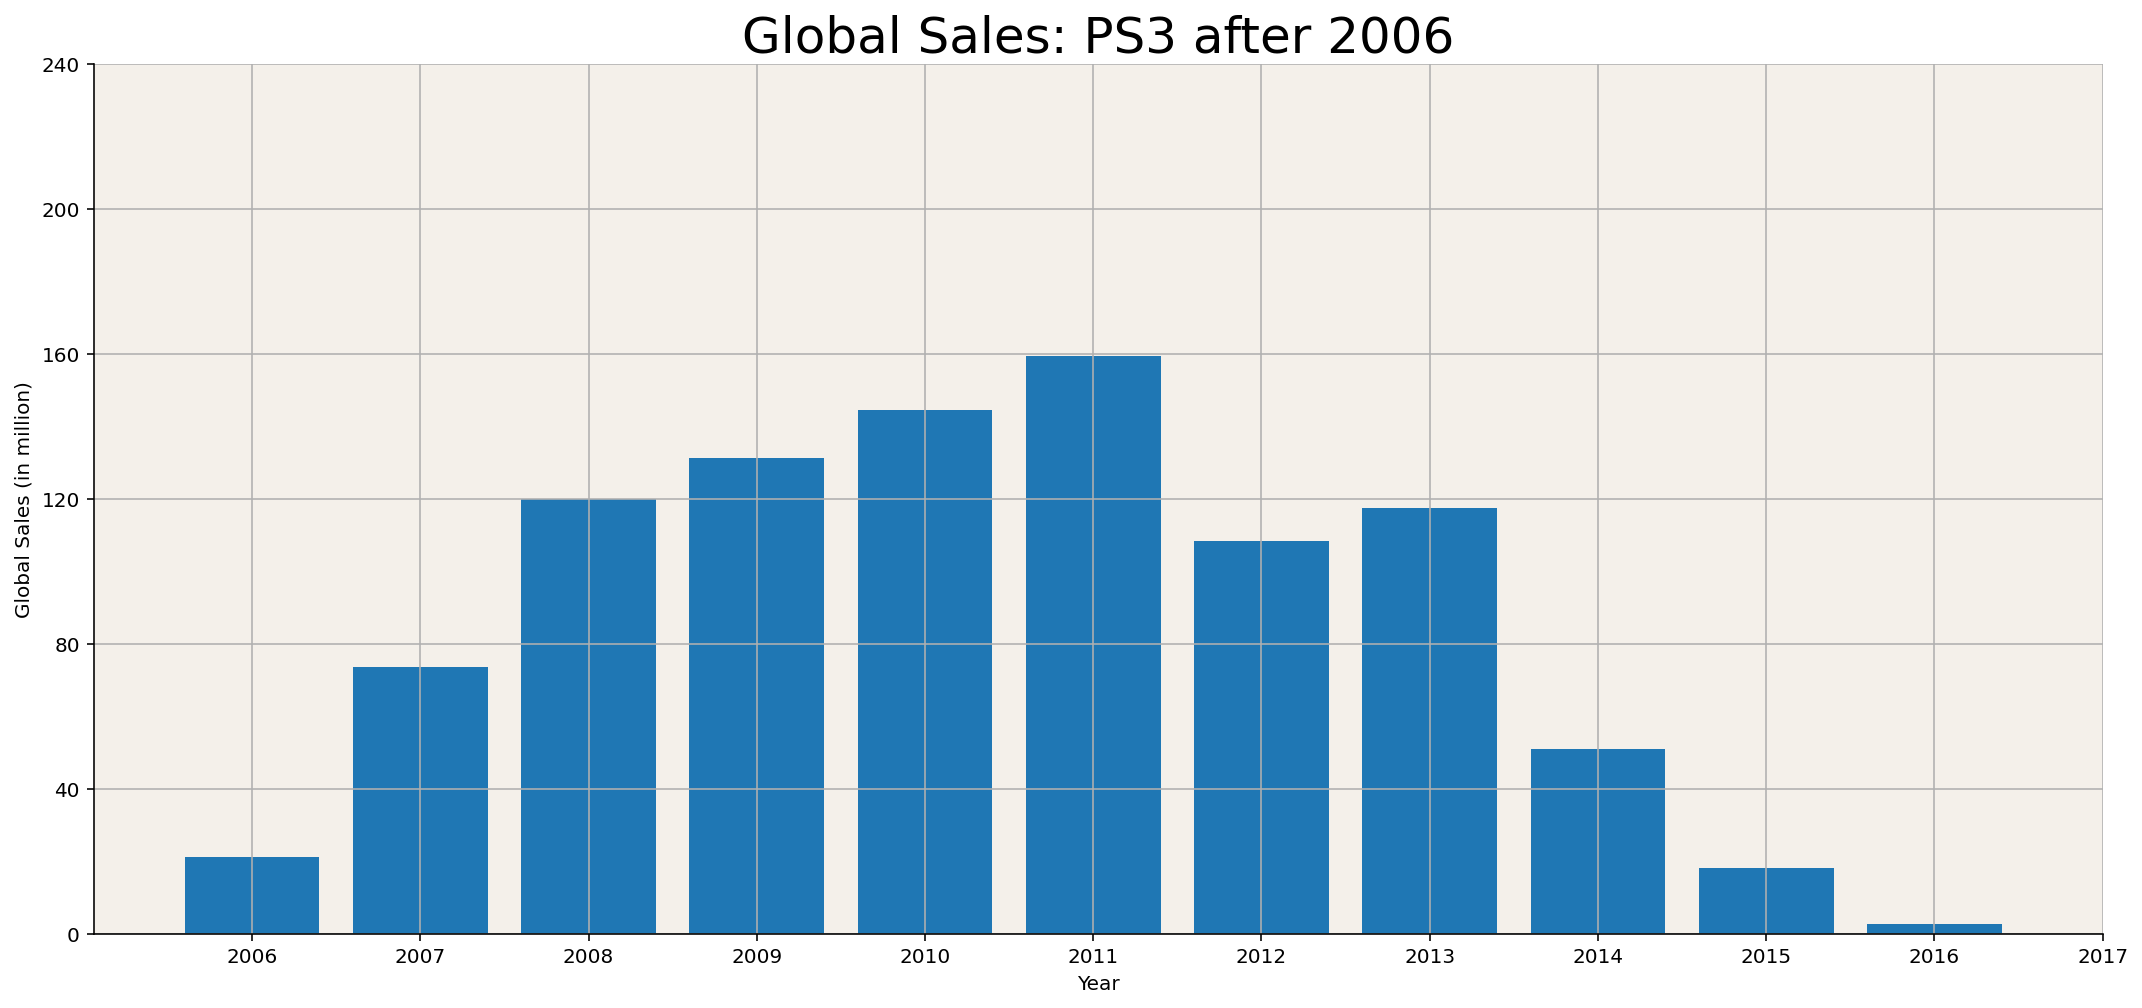

In [ ]:
cum_sales_platform(genre = 'PS3', yr = 2006) #2006년부터 통계

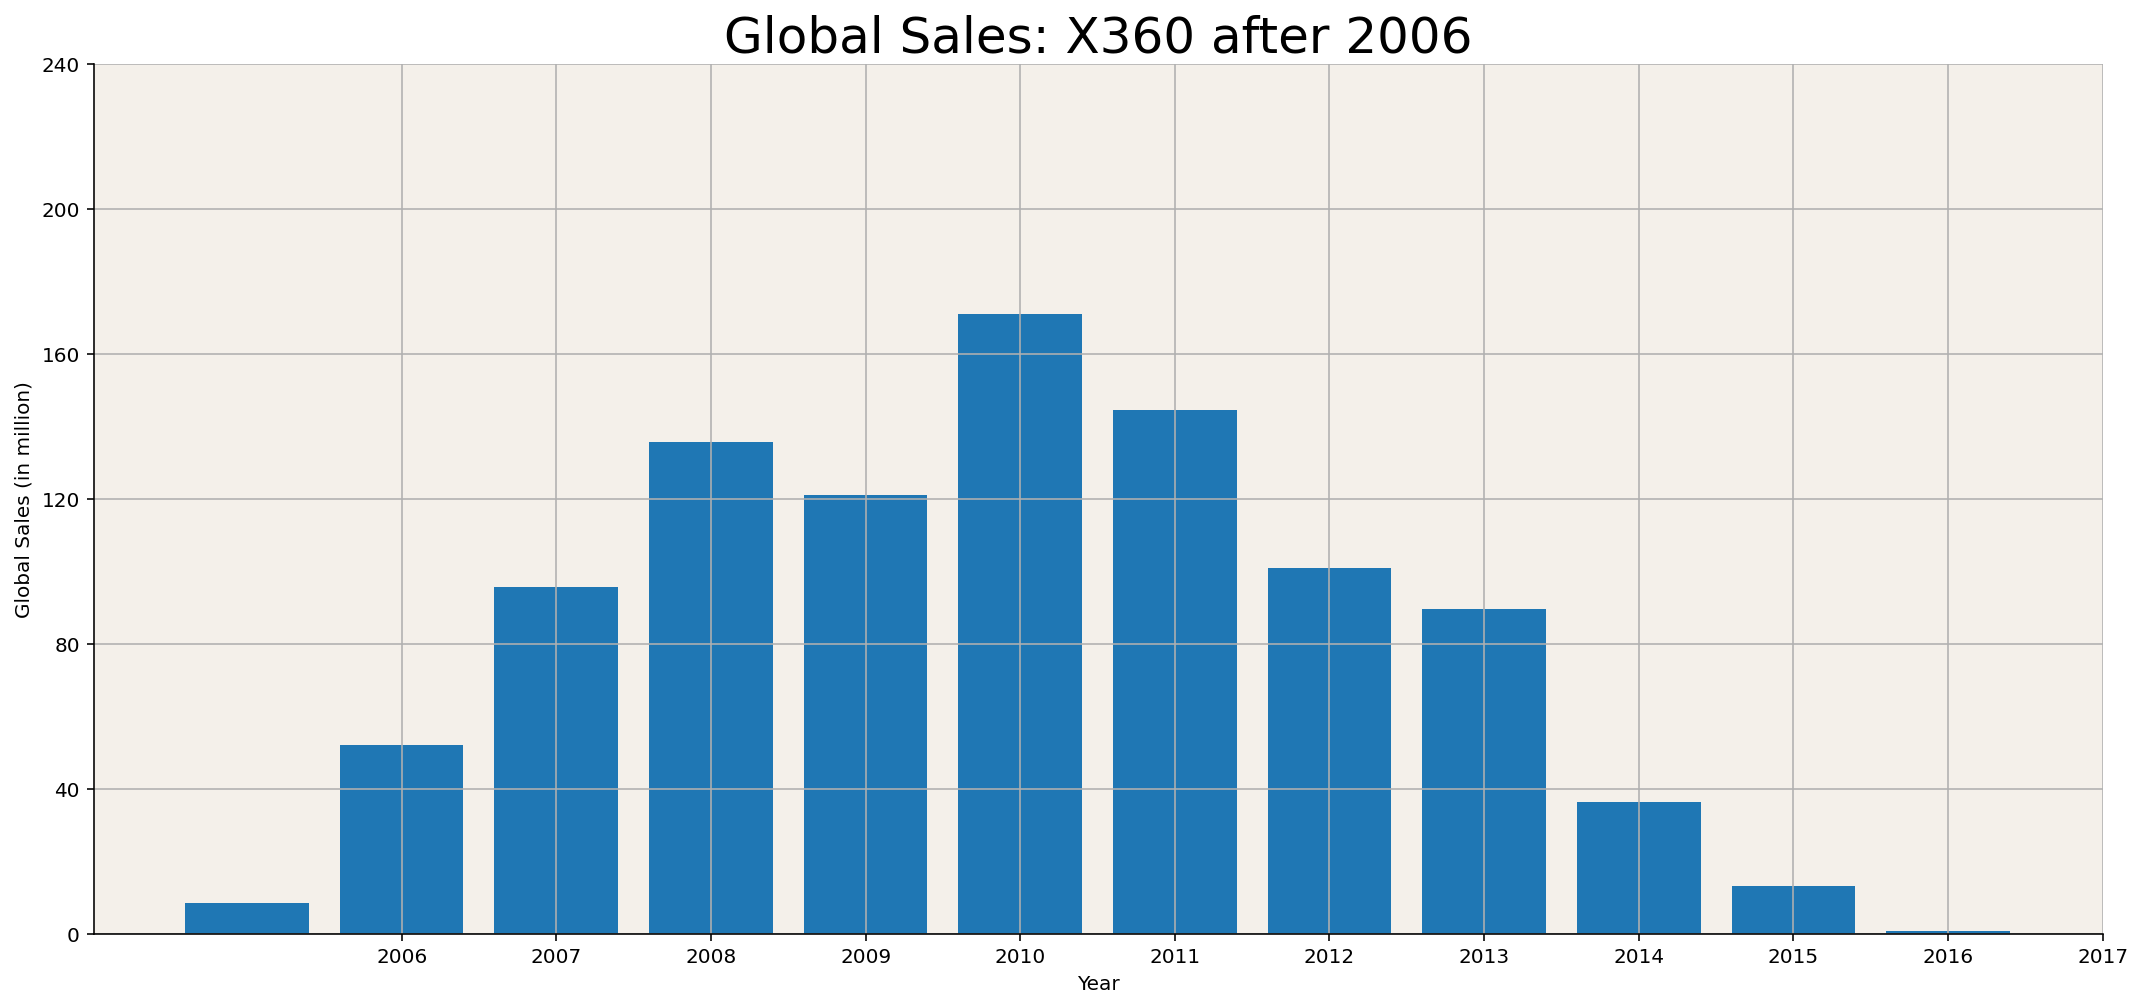

In [ ]:
cum_sales_platform(genre = 'X360', yr = 2006)

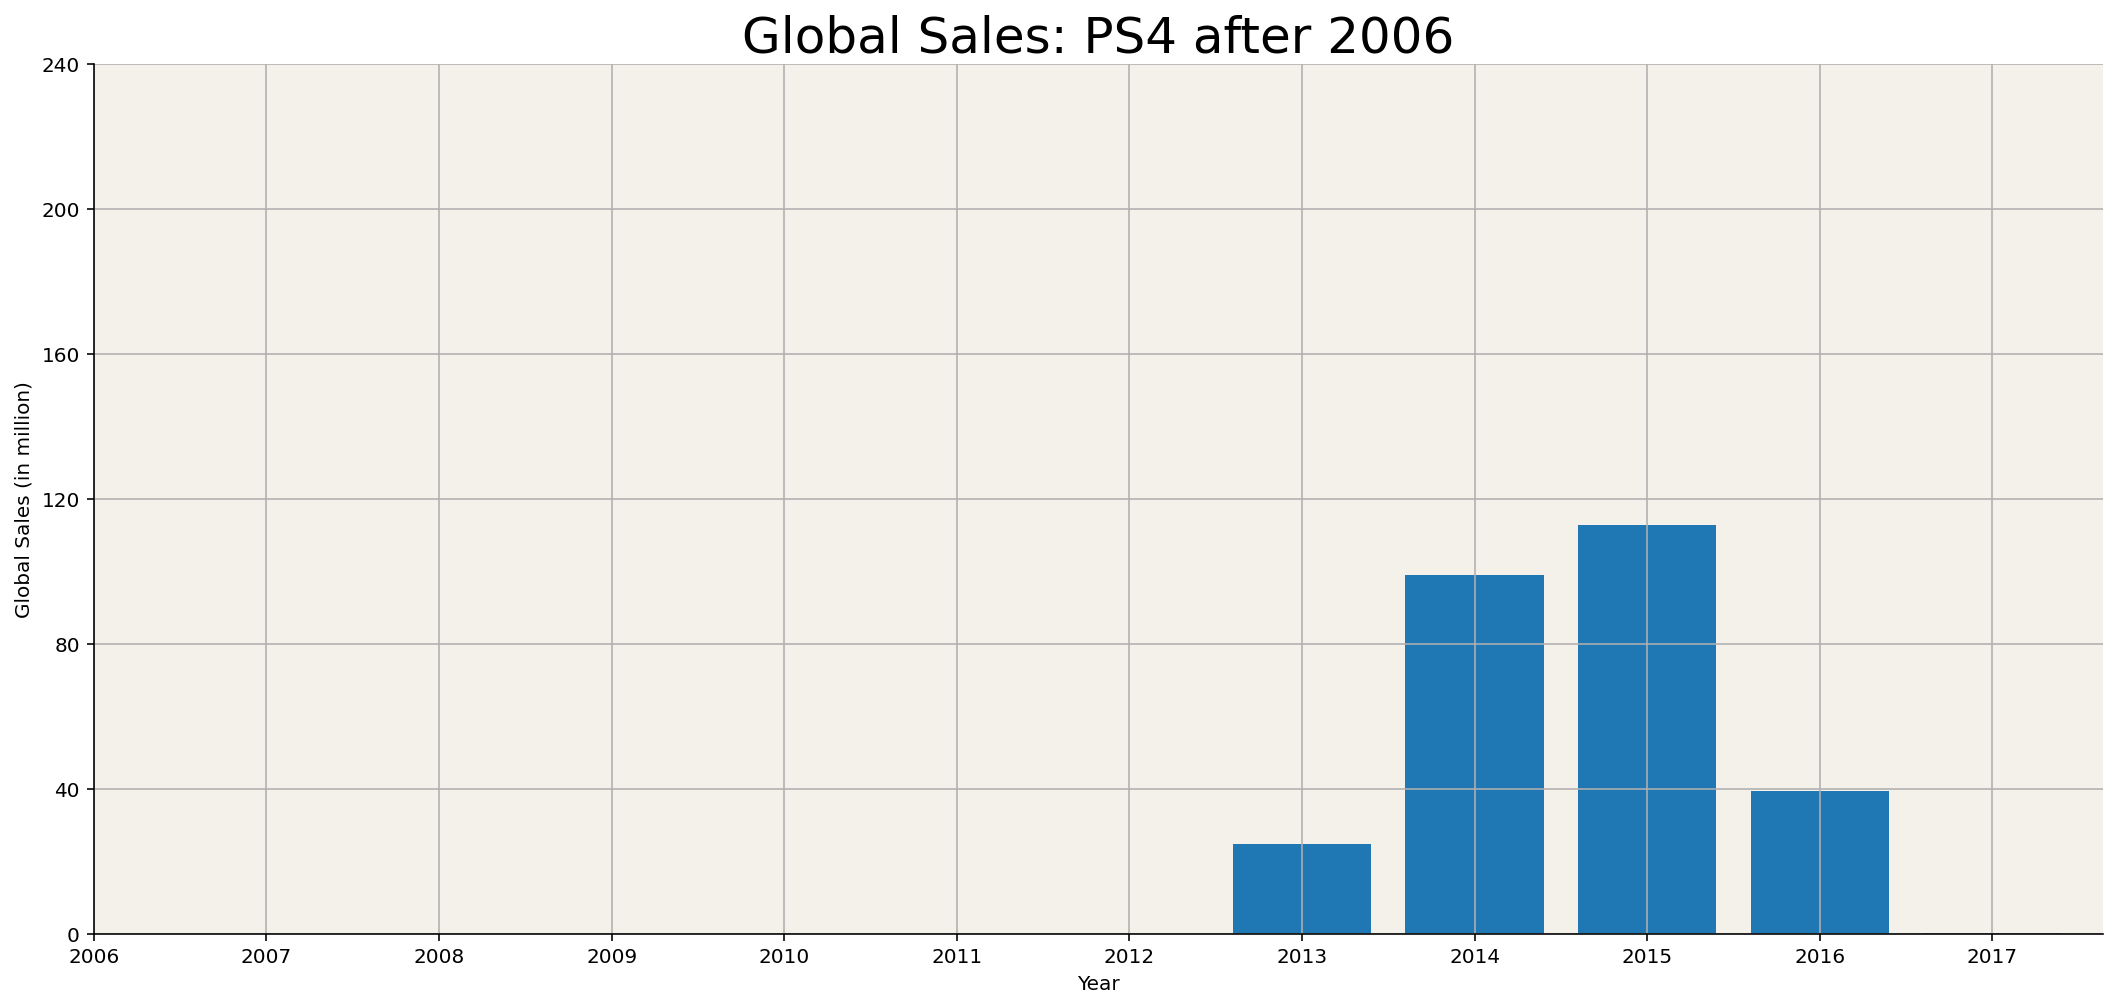

In [ ]:
cum_sales_platform(genre = 'PS4', yr = 2006)

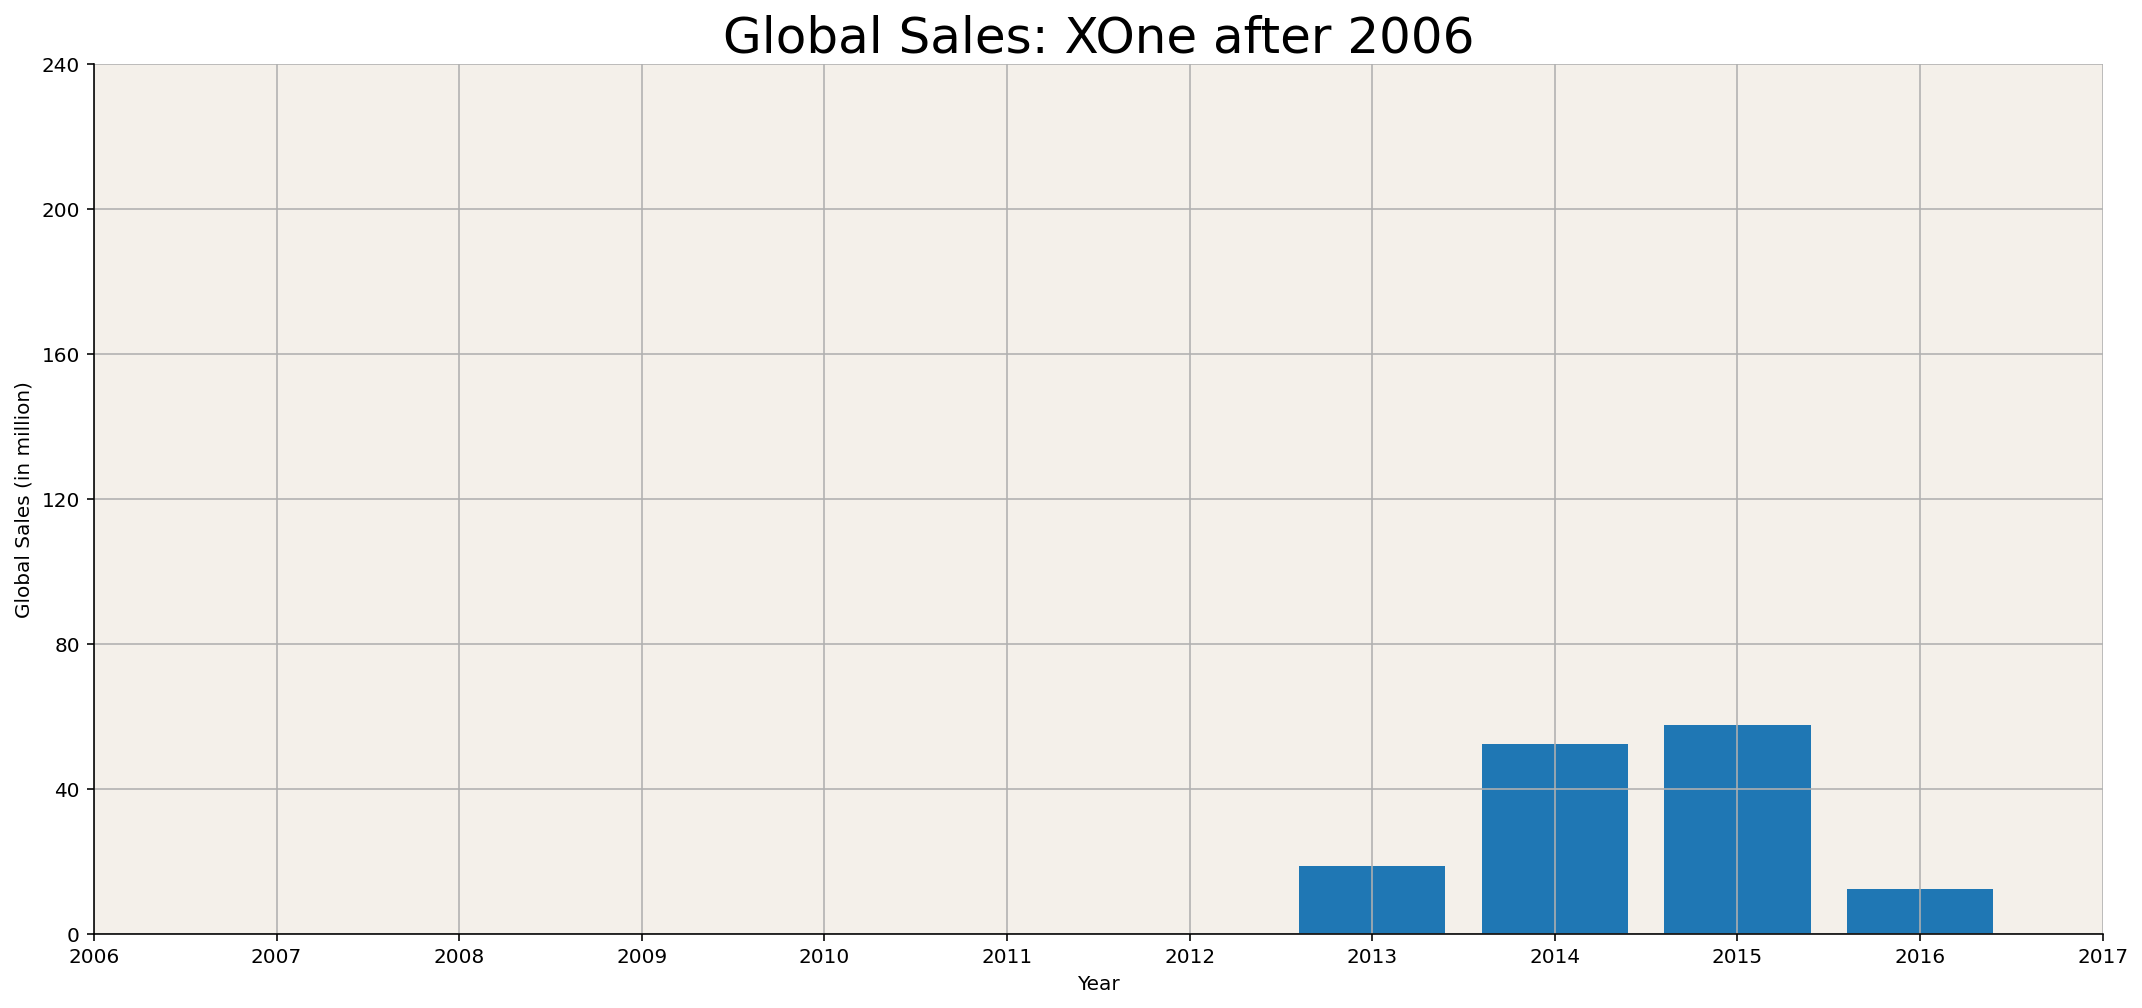

In [ ]:
cum_sales_platform(genre = 'XOne', yr = 2006)

위 자료들이 시간이 지날수록 플랫폼 세대교체가 이루어지고 있음을 알 수있음.

최근 5년간 탑 3 장르 출고량

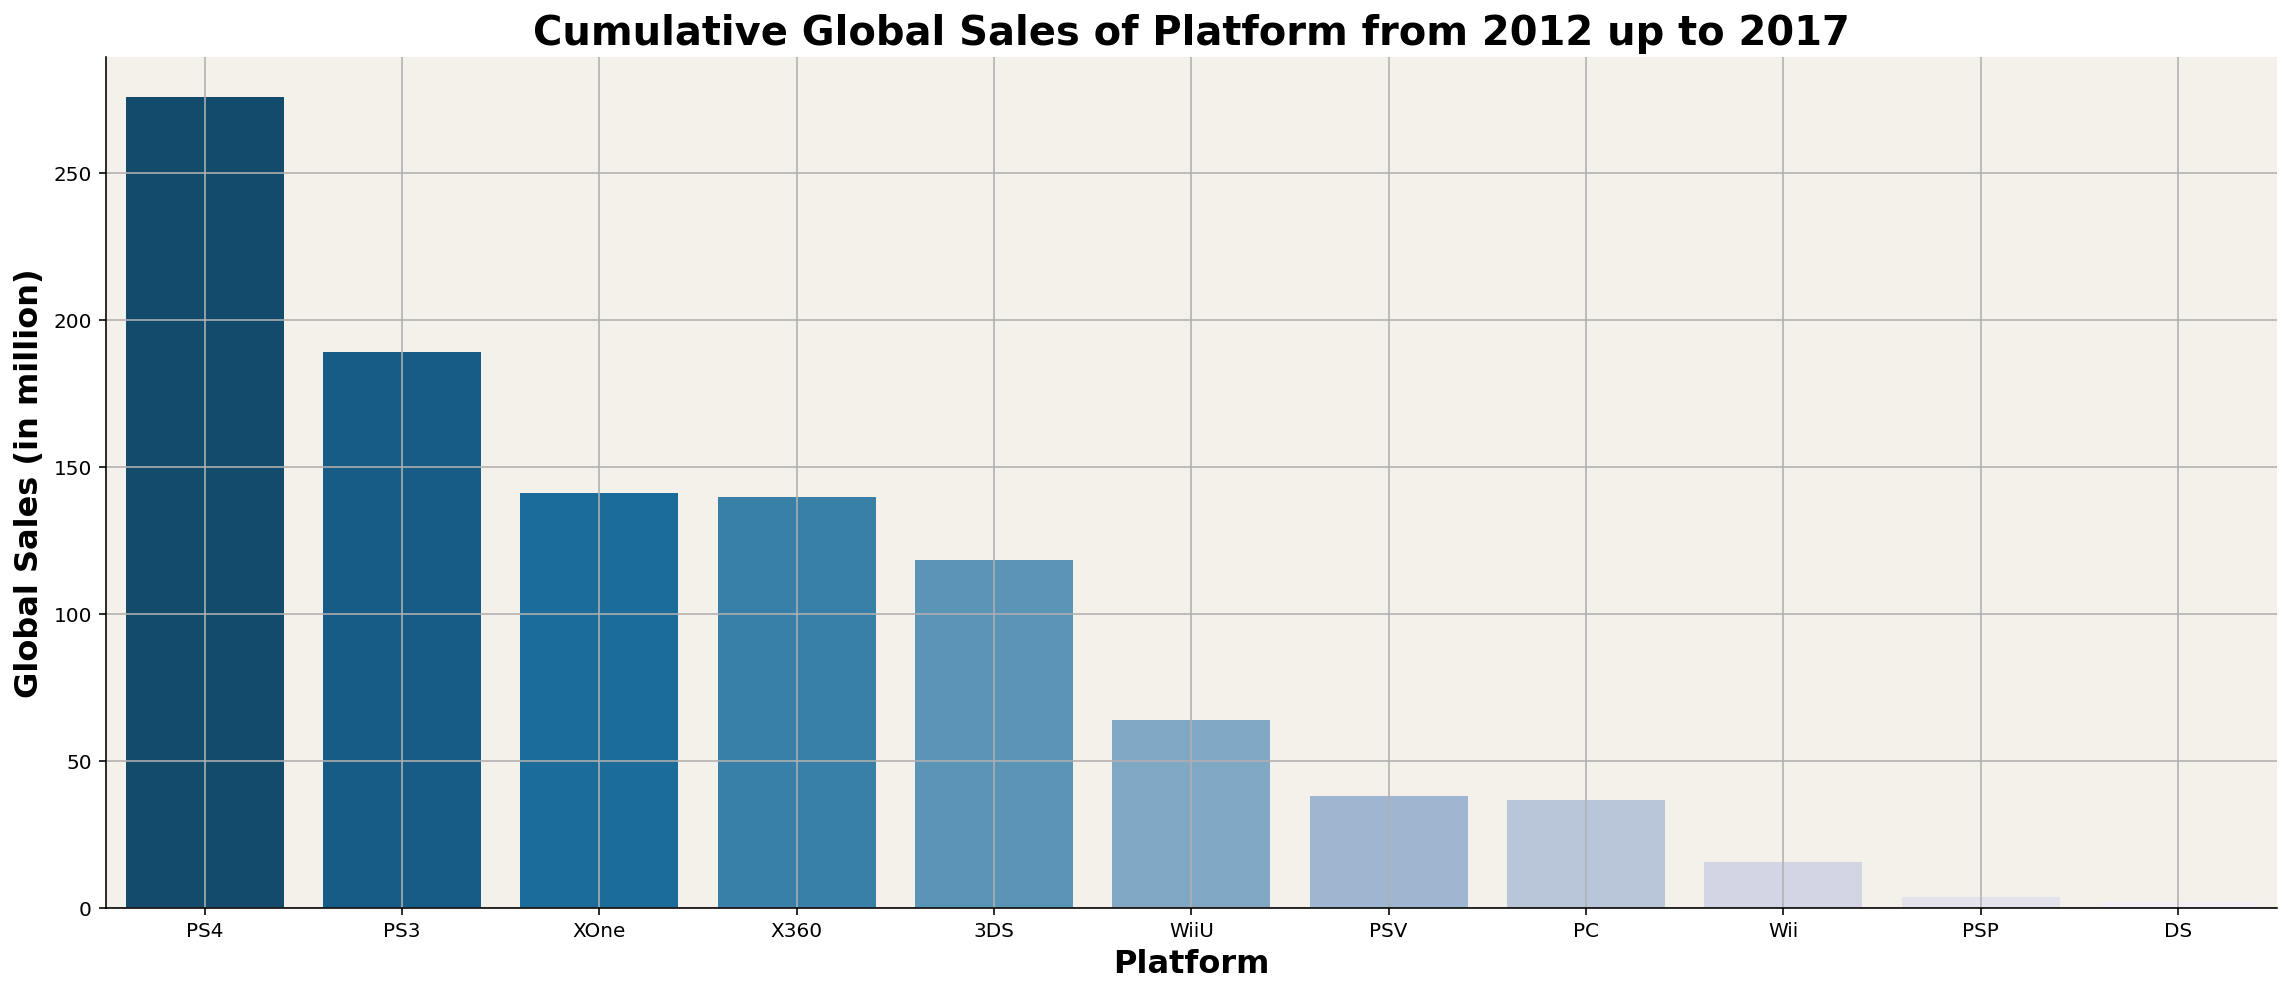

In [ ]:
yr_cond = (df['Year'] > 2012)
top_data = pd.DataFrame(df[yr_cond].groupby(by = ['Platform'])[['Global_Sales']].sum()).reset_index()
top_data.sort_values(by = 'Global_Sales', ascending=False, inplace = True)


fig, ax = plt.subplots(figsize = (16,7))
palette = sns.color_palette("PuBu_r", 11)
sns.barplot(x = 'Platform', y = 'Global_Sales', data = top_data, palette = palette)


font_title = {
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }
ax.set_title("Cumulative Global Sales of Platform from 2012 up to 2017", fontdict = font_title)


font_text = {
    'color':  'black',
    'weight': 'bold',
    'size': 16,
    }

plt.ylabel("Global Sales (in million)", fontdict = font_text)
plt.xlabel("Platform",fontdict = font_text)


for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

ax.grid(True)
ax.set_facecolor('#f4f0ea')
fig.tight_layout()
plt.show()

최근 5년간 탑 3(액션,스포츠,슈터)에 관한 누적 판매량을 조회한 결과 PS4 , PS3가 압도적인 판매량을 보여줌

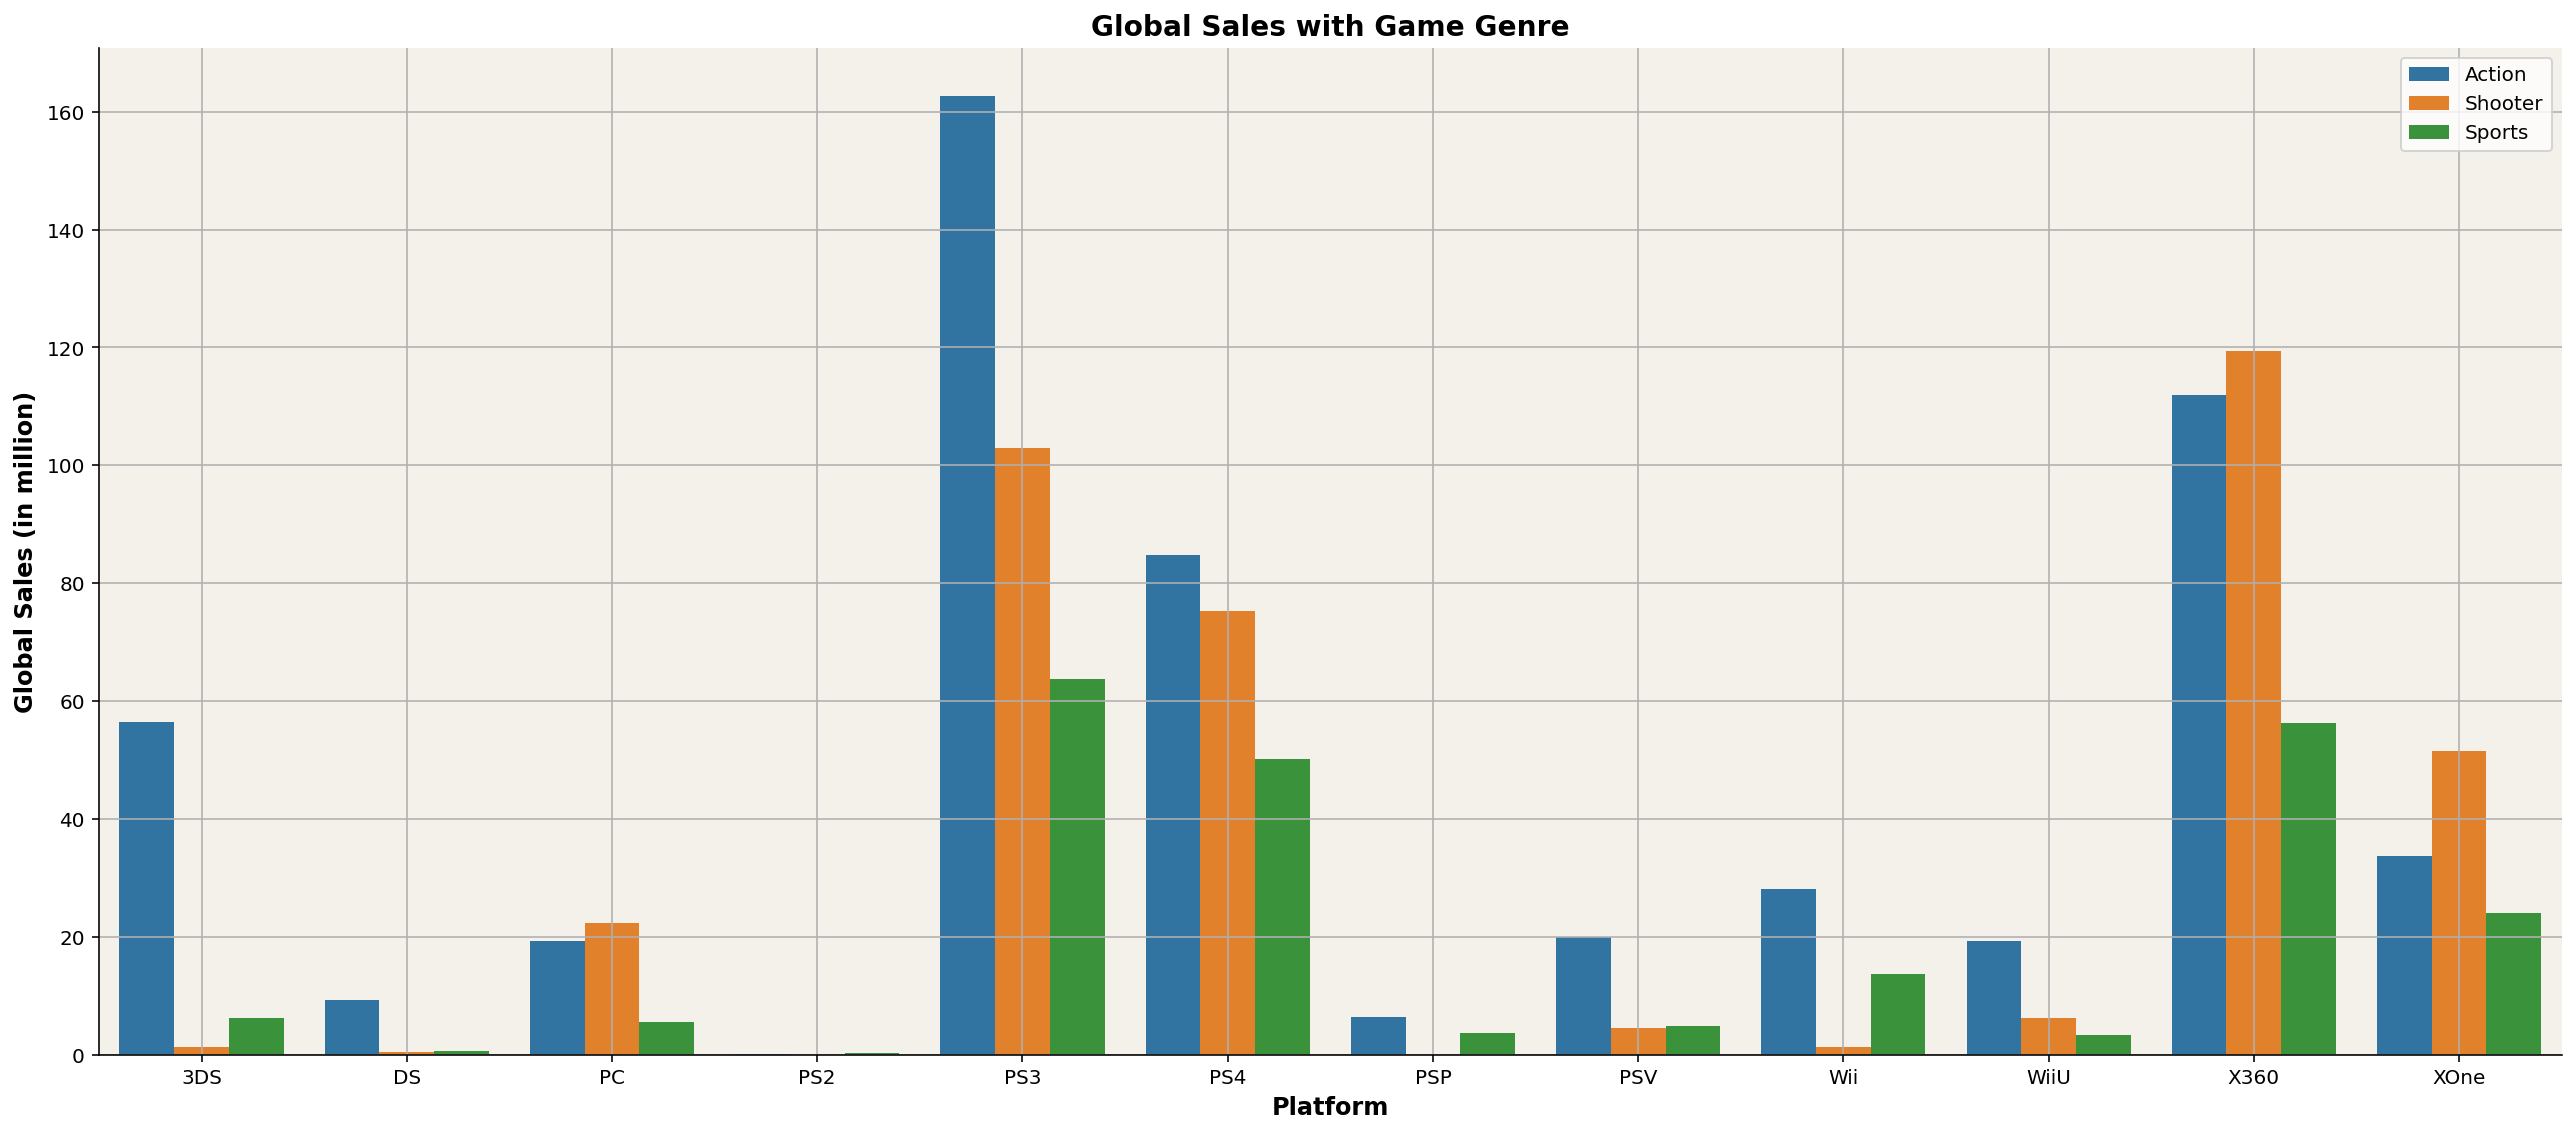

In [ ]:
top3 = ['Action', 'Shooter', 'Sports']
yr = 2010
yr_cond = (df['Year'] > yr)
top3_data = pd.DataFrame(df[yr_cond].groupby(by = ['Platform','Genre'])[['Global_Sales']].sum()).reset_index()

top3_data = top3_data[top3_data['Genre'].isin(top3)]

fig, ax = plt.subplots(figsize = (18,8))
sns.barplot(x = 'Platform', y = 'Global_Sales', data = top3_data, hue = 'Genre')


font_title = {
        'color':  'black',
        'weight': 'bold',
        'size': 14,
        }
ax.set_title("Global Sales with Game Genre", fontdict = font_title)


font_text = {
    'color':  'black',
    'weight': 'bold',
    'size': 12,
    }

plt.ylabel("Global Sales (in million)", fontdict = font_text)
plt.xlabel("Platform",fontdict = font_text)


for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

ax.grid(True)
ax.set_facecolor('#f4f0ea')
plt.legend()
fig.tight_layout()
plt.show()

다음 게임설계를 위해 염두해야할 요소들로

플랫폼은 : 70% 이상으로 압도하고 있는 PS3, PS4, X360 으로 게임을 설계하는 것이 좋아보이나, 플랫폼 세대교체로 인한 요인을 생각해서 PS4, XOne이나 차세대 기종(PS5,XBOX Series X)에 대한 고민을 해보는 것이 좋을듯 함.

장르: 반짝하는 장르보단 꾸준히 사랑받아온 액션이나 슈터, 스포츠로 구성

지역: 위에 명시된 장르를 선호하며, 시장규모가 큰 북미 유럽시장이 가능성이 크다.